In [1]:
from google.colab import files
uploaded = files.upload()

Saving neighbourhood-profiles-2021-158-model(1).xlsx to neighbourhood-profiles-2021-158-model(1).xlsx
Saving Major_Crime_Indicators_Open_Data_-3805566126367379926.csv to Major_Crime_Indicators_Open_Data_-3805566126367379926.csv


In [2]:
#Load the initial dataset into dataframe
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Major_Crime_Indicators_Open_Data_-3805566126367379926.csv']))
df.shape

(430614, 31)

In [3]:
#Select records for years 2021 - 2024, sort by REPORT_DATE
df_mci = df.copy()
df_mci = df_mci[(df_mci['REPORT_YEAR'] >= 2021) &
      (df_mci['REPORT_YEAR'] < 2025)]
df_mci.sort_values(by='REPORT_DATE', ascending=True)
df_mci.tail(10)

OBJECTID EVENT_UNIQUE_ID            REPORT_DATE  \
420489    420490  GO-20242821061  12/31/2024 5:00:00 AM   
420490    420491  GO-20242819772  12/31/2024 5:00:00 AM   
420491    420492  GO-20242820426  12/31/2024 5:00:00 AM   
420492    420493  GO-20242814702  12/31/2024 5:00:00 AM   
420493    420494  GO-20242818725  12/31/2024 5:00:00 AM   
420494    420495  GO-20242818725  12/31/2024 5:00:00 AM   
420495    420496  GO-20242816566  12/31/2024 5:00:00 AM   
420496    420497  GO-20242817087  12/31/2024 5:00:00 AM   
420497    420498  GO-20242818018  12/31/2024 5:00:00 AM   
420498    420499  GO-20242815101  12/31/2024 5:00:00 AM   

                     OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
420489  12/31/2024 5:00:00 AM         2024     December          31   
420490  12/30/2024 5:00:00 AM         2024     December          31   
420491  12/31/2024 5:00:00 AM         2024     December          31   
420492  12/31/2024 5:00:00 AM         2024     December          31   
420493  12/31/2024 5:00:00 AM         2024     December          31   
420494  12/31/2024 5:00:00 AM         2024     December          31   
420495  12/31/2024 5:00:00 AM         2024     December          31   
420496  12/31/2024 5:00:00 AM         2024     December          31   
420497  12/31/2024 5:00:00 AM         2024     December          31   
420498  12/31/2024 5:00:00 AM         2024     December          31   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...                 OFFENCE  \
420489         366  Tuesday              22  ...     Robbery With Weapon   
420490         366  Tuesday              18  ...                 Assault   
420491         366  Tuesday              20  ...     Assault With Weapon   
420492         366  Tuesday               1  ...  Theft Of Motor Vehicle   
420493         366  Tuesday              15  ...                 Assault   
420494         366  Tuesday              15  ...                 Assault   
420495         366  Tuesday              12  ...              Theft Over   
420496         366  Tuesday              14  ...                     B&E   
420497         366  Tuesday              13  ...                 Assault   
420498         366  Tuesday               3  ...  Theft Of Motor Vehicle   

           MCI_CATEGORY  HOOD_158                      NEIGHBOURHOOD_158  \
420489          Robbery       126                      Dorset Park (126)   
420490          Assault       108             Briar Hill-Belgravia (108)   
420491          Assault       033                      Clanton Park (33)   
420492       Auto Theft       002  Mount Olive-Silverstone-Jamestown (2)   
420493          Assault       074               North St.James Town (74)   
420494          Assault       074               North St.James Town (74)   
420495       Theft Over       009           Edenbridge-Humber Valley (9)   
420496  Break and Enter       084                   Little Portugal (84)   
420497          Assault       029                        Maple Leaf (29)   
420498       Auto Theft       078              Kensington-Chinatown (78)   

       HOOD_140                      NEIGHBOURHOOD_140 LONG_WGS84  LAT_WGS84  \
420489      126                      Dorset Park (126) -79.273631  43.745996   
420490      108             Briar Hill-Belgravia (108) -79.440599  43.701073   
420491      033                      Clanton Park (33) -79.449706  43.734062   
420492      002  Mount Olive-Silverstone-Jamestown (2) -79.585776  43.750942   
420493      074               North St.James Town (74) -79.373767  43.667288   
420494      074               North St.James Town (74) -79.373767  43.667288   
420495      009           Edenbridge-Humber Valley (9) -79.524582  43.672837   
420496      084                   Little Portugal (84) -79.423596  43.643234   
420497      029                        Maple Leaf (29) -79.478591  43.711185   
420498      078              Kensington-Chinatown (78) -79.401983  43.647598   

                   x 

In [4]:
df_mci.shape

(173820, 31)

In [5]:
df_mci[df_mci.REPORT_DOW.str.contains('Monday')].index[0]

np.int64(246904)

In [6]:
last_index = df_mci[df_mci['REPORT_DOW'].str.contains('Sunday')].index[-1]
last_index

np.int64(420245)

In [7]:
#Remove a partial week at the beginning of dataset (new week starts from Monday).
df_mci = df_mci.loc[(df_mci[df_mci.REPORT_DOW.str.contains('Monday')].index[0]) : df_mci[df_mci['REPORT_DOW'].str.contains('Sunday')].index[-1]]
df_mci.shape

(173342, 31)

In [8]:
df_mci

OBJECTID EVENT_UNIQUE_ID            REPORT_DATE  \
246904    246905    GO-202118735    1/4/2021 5:00:00 AM   
246905    246906    GO-202118735    1/4/2021 5:00:00 AM   
246906    246907    GO-202115012    1/4/2021 5:00:00 AM   
246907    246908  GO-20212356161    1/4/2021 5:00:00 AM   
246908    246909    GO-202118245    1/4/2021 5:00:00 AM   
...          ...             ...                    ...   
420241    420242  GO-20242806824  12/29/2024 5:00:00 AM   
420242    420243  GO-20242807008  12/29/2024 5:00:00 AM   
420243    420244  GO-20242801710  12/29/2024 5:00:00 AM   
420244    420245  GO-20242807066  12/29/2024 5:00:00 AM   
420245    420246  GO-20242806966  12/29/2024 5:00:00 AM   

                     OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
246904  12/27/2020 5:00:00 AM         2021      January           4   
246905  12/27/2020 5:00:00 AM         2021      January           4   
246906   12/1/2020 5:00:00 AM         2021      January           4   
246907    1/4/2021 5:00:00 AM         2021      January           4   
246908   12/3/2020 5:00:00 AM         2021      January           4   
...                       ...          ...          ...         ...   
420241  12/29/2024 5:00:00 AM         2024     December          29   
420242  12/29/2024 5:00:00 AM         2024     December          29   
420243  12/29/2024 5:00:00 AM         2024     December          29   
420244  12/29/2024 5:00:00 AM         2024     December          29   
420245  12/29/2024 5:00:00 AM         2024     December          29   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...                 OFFENCE  \
246904           4  Monday                9  ...              Theft Over   
246905           4  Monday                9  ...                     B&E   
246906           4  Monday               14  ...                     B&E   
246907           4  Monday                6  ...  Theft Of Motor Vehicle   
246908           4  Monday               13  ...                     B&E   
...            ...         ...          ...  ...                     ...   
420241         364  Sunday               22  ...                 Assault   
420242         364  Sunday               23  ...                     B&E   
420243         364  Sunday                4  ...     Assault With Weapon   
420244         364  Sunday               23  ...                     B&E   
420245         364  Sunday               23  ...     Assault With Weapon   

           MCI_CATEGORY  HOOD_158                   NEIGHBOURHOOD_158  \
246904       Theft Over       141     Golfdale-Cedarbrae-Woburn (141)   
246905  Break and Enter       141     Golfdale-Cedarbrae-Woburn (141)   
246906  Break and Enter       097                 Yonge-St.Clair (97)   
246907       Auto Theft       144           Morningside Heights (144)   
246908  Break and Enter       173                 North Toronto (173)   
...                 ...       ...                                 ...   
420241          Assault       049          Bayview Woods-Steeles (49)   
420242  Break and Enter       128  Agincourt South-Malvern West (128)   
420243          Assault       036               Newtonbrook West (36)   
420244  Break and Enter       144           Morningside Heights (144)   
420245          Assault       092         Corso Italia-Davenport (92)   

       HOOD_140                   NEIGHBOURHOOD_140 LONG_WGS84  LAT_WGS84  \
246904      137                        Woburn (137) -79.205649  43.764062   
246905      137                        Woburn (137) -79.205649  43.764062   
246906      097                 Yonge-St.Clair (97) -79.392380  43.683934   
246907      131                         Rouge (131) -79.227042  43.834025   
246908      104           Mount Pleasant West (104) -79.394125  43.707598   
...         ...                                 ...        ...        ...   
420241      049          Bayview Woods-Steeles (49) -79.383942  43.794515   
420242      128  Agincourt South-Malvern

In [13]:
#Replace month names with the corresponding int values (January =1, Feb = 2, etc.)
df_mci['REPORT_MONTH_SEQ'] = df_mci['REPORT_MONTH'].replace('January', 1).replace('February', 2).replace('March', 3).replace('April', 4).replace('May', 5).replace('June', 6).replace('July', 7).replace('August', 8).replace('September', 9).replace('October', 10).replace('November', 11).replace('December', 12)

In [14]:
#Create a column DAY_SEQ that keeps a sequential number of day since the starting date of analysis (i.e., from January 4, 2021)
from datetime import datetime
df_mci['DAY_SEQ'] = pd.to_datetime(df_mci["REPORT_MONTH_SEQ"].astype(str) + "/" + df_mci["REPORT_DAY"].astype(str) + "/" + df_mci["REPORT_YEAR"].astype(str))
df_mci['DAY_SEQ'] = (df_mci['DAY_SEQ'] - df_mci['DAY_SEQ'].iloc[0]).dt.days
df_mci

OBJECTID EVENT_UNIQUE_ID            REPORT_DATE  \
246904    246905    GO-202118735    1/4/2021 5:00:00 AM   
246905    246906    GO-202118735    1/4/2021 5:00:00 AM   
246906    246907    GO-202115012    1/4/2021 5:00:00 AM   
246907    246908  GO-20212356161    1/4/2021 5:00:00 AM   
246908    246909    GO-202118245    1/4/2021 5:00:00 AM   
...          ...             ...                    ...   
420241    420242  GO-20242806824  12/29/2024 5:00:00 AM   
420242    420243  GO-20242807008  12/29/2024 5:00:00 AM   
420243    420244  GO-20242801710  12/29/2024 5:00:00 AM   
420244    420245  GO-20242807066  12/29/2024 5:00:00 AM   
420245    420246  GO-20242806966  12/29/2024 5:00:00 AM   

                     OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
246904  12/27/2020 5:00:00 AM         2021      January           4   
246905  12/27/2020 5:00:00 AM         2021      January           4   
246906   12/1/2020 5:00:00 AM         2021      January           4   
246907    1/4/2021 5:00:00 AM         2021      January           4   
246908   12/3/2020 5:00:00 AM         2021      January           4   
...                       ...          ...          ...         ...   
420241  12/29/2024 5:00:00 AM         2024     December          29   
420242  12/29/2024 5:00:00 AM         2024     December          29   
420243  12/29/2024 5:00:00 AM         2024     December          29   
420244  12/29/2024 5:00:00 AM         2024     December          29   
420245  12/29/2024 5:00:00 AM         2024     December          29   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  HOOD_158  \
246904           4  Monday                9  ...       141   
246905           4  Monday                9  ...       141   
246906           4  Monday               14  ...       097   
246907           4  Monday                6  ...       144   
246908           4  Monday               13  ...       173   
...            ...         ...          ...  ...       ...   
420241         364  Sunday               22  ...       049   
420242         364  Sunday               23  ...       128   
420243         364  Sunday                4  ...       036   
420244         364  Sunday               23  ...       144   
420245         364  Sunday               23  ...       092   

                         NEIGHBOURHOOD_158  HOOD_140  \
246904     Golfdale-Cedarbrae-Woburn (141)       137   
246905     Golfdale-Cedarbrae-Woburn (141)       137   
246906                 Yonge-St.Clair (97)       097   
246907           Morningside Heights (144)       131   
246908                 North Toronto (173)       104   
...                                    ...       ...   
420241          Bayview Woods-Steeles (49)       049   
420242  Agincourt South-Malvern West (128)       128   
420243               Newtonbrook West (36)       036   
420244           Morningside Heights (144)       131   
420245         Corso Italia-Davenport (92)       092   

                         NEIGHBOURHOOD_140 LONG_WGS84  LAT_WGS84  \
246904                        Woburn (137) -79.205649  43.764062   
246905                        Woburn (137) -79.205649  43.764062   
246906                 Yonge-St.Clair (97) -79.392380  43.683934   
246907                         Rouge (131) -79.227042  43.834025   
246908           Mount Pleasant West (104) -79.394125  43.707598   
...                                    ...        ...        ...   
420241          Bayview Woods-Steeles (49) -79.383942  43.794515   
420242  Agincourt South-Malvern West (128) -79.252186  43.789439   
420243               Newtonbrook West (36) -79.419619  43.796317   
420244                         Rouge (131) -79.177442  43.822902   
420245         Corso Italia-Davenport (92) -79.455770  43.677775   

                   x             y REPORT_MONTH_SEQ  DAY_SEQ  
246904 -8.817132e+06  5.429003e+06                1        0  
246905 -8.817132e+06  5.429003e+06                1        0  
246906 -8.837919e+06  

In [15]:
# Create a column WEEK_SEQ that keeps a sequential number of a week since the starting date of analysis (i.e., from January 4, 2021)
df_mci['WEEK_SEQ'] = (df_mci['DAY_SEQ'] // 7) + 1
df_mci.head(5)

OBJECTID EVENT_UNIQUE_ID          REPORT_DATE               OCC_DATE  \
246904    246905    GO-202118735  1/4/2021 5:00:00 AM  12/27/2020 5:00:00 AM   
246905    246906    GO-202118735  1/4/2021 5:00:00 AM  12/27/2020 5:00:00 AM   
246906    246907    GO-202115012  1/4/2021 5:00:00 AM   12/1/2020 5:00:00 AM   
246907    246908  GO-20212356161  1/4/2021 5:00:00 AM    1/4/2021 5:00:00 AM   
246908    246909    GO-202118245  1/4/2021 5:00:00 AM   12/3/2020 5:00:00 AM   

        REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  \
246904         2021      January           4           4  Monday       
246905         2021      January           4           4  Monday       
246906         2021      January           4           4  Monday       
246907         2021      January           4           4  Monday       
246908         2021      January           4           4  Monday       

        REPORT_HOUR  ...                NEIGHBOURHOOD_158 HOOD_140  \
246904            9  ...  Golfdale-Cedarbrae-Woburn (141)      137   
246905            9  ...  Golfdale-Cedarbrae-Woburn (141)      137   
246906           14  ...              Yonge-St.Clair (97)      097   
246907            6  ...        Morningside Heights (144)      131   
246908           13  ...              North Toronto (173)      104   

                NEIGHBOURHOOD_140  LONG_WGS84  LAT_WGS84             x  \
246904               Woburn (137)  -79.205649  43.764062 -8.817132e+06   
246905               Woburn (137)  -79.205649  43.764062 -8.817132e+06   
246906        Yonge-St.Clair (97)  -79.392380  43.683934 -8.837919e+06   
246907                Rouge (131)  -79.227042  43.834025 -8.819514e+06   
246908  Mount Pleasant West (104)  -79.394125  43.707598 -8.838114e+06   

                   y REPORT_MONTH_SEQ DAY_SEQ  WEEK_SEQ  
246904  5.429003e+06                1       0         1  
246905  5.429003e+06                1       0         1  
246906  5.416660e+06                1       0         1  
246907  5.439793e+06                1       0         1  
246908  5.420303e+06                1       0         1  

[5 rows x 34 columns]

In [16]:
# Drop rows where neighborhood profile is unknown
df_mci.drop(df_mci[df_mci['HOOD_158'].str.contains('NSA')].index, inplace = True)
df_mci

OBJECTID EVENT_UNIQUE_ID            REPORT_DATE  \
246904    246905    GO-202118735    1/4/2021 5:00:00 AM   
246905    246906    GO-202118735    1/4/2021 5:00:00 AM   
246906    246907    GO-202115012    1/4/2021 5:00:00 AM   
246907    246908  GO-20212356161    1/4/2021 5:00:00 AM   
246908    246909    GO-202118245    1/4/2021 5:00:00 AM   
...          ...             ...                    ...   
420241    420242  GO-20242806824  12/29/2024 5:00:00 AM   
420242    420243  GO-20242807008  12/29/2024 5:00:00 AM   
420243    420244  GO-20242801710  12/29/2024 5:00:00 AM   
420244    420245  GO-20242807066  12/29/2024 5:00:00 AM   
420245    420246  GO-20242806966  12/29/2024 5:00:00 AM   

                     OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  \
246904  12/27/2020 5:00:00 AM         2021      January           4   
246905  12/27/2020 5:00:00 AM         2021      January           4   
246906   12/1/2020 5:00:00 AM         2021      January           4   
246907    1/4/2021 5:00:00 AM         2021      January           4   
246908   12/3/2020 5:00:00 AM         2021      January           4   
...                       ...          ...          ...         ...   
420241  12/29/2024 5:00:00 AM         2024     December          29   
420242  12/29/2024 5:00:00 AM         2024     December          29   
420243  12/29/2024 5:00:00 AM         2024     December          29   
420244  12/29/2024 5:00:00 AM         2024     December          29   
420245  12/29/2024 5:00:00 AM         2024     December          29   

        REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  \
246904           4  Monday                9  ...   
246905           4  Monday                9  ...   
246906           4  Monday               14  ...   
246907           4  Monday                6  ...   
246908           4  Monday               13  ...   
...            ...         ...          ...  ...   
420241         364  Sunday               22  ...   
420242         364  Sunday               23  ...   
420243         364  Sunday                4  ...   
420244         364  Sunday               23  ...   
420245         364  Sunday               23  ...   

                         NEIGHBOURHOOD_158 HOOD_140  \
246904     Golfdale-Cedarbrae-Woburn (141)      137   
246905     Golfdale-Cedarbrae-Woburn (141)      137   
246906                 Yonge-St.Clair (97)      097   
246907           Morningside Heights (144)      131   
246908                 North Toronto (173)      104   
...                                    ...      ...   
420241          Bayview Woods-Steeles (49)      049   
420242  Agincourt South-Malvern West (128)      128   
420243               Newtonbrook West (36)      036   
420244           Morningside Heights (144)      131   
420245         Corso Italia-Davenport (92)      092   

                         NEIGHBOURHOOD_140  LONG_WGS84  LAT_WGS84  \
246904                        Woburn (137)  -79.205649  43.764062   
246905                        Woburn (137)  -79.205649  43.764062   
246906                 Yonge-St.Clair (97)  -79.392380  43.683934   
246907                         Rouge (131)  -79.227042  43.834025   
246908           Mount Pleasant West (104)  -79.394125  43.707598   
...                                    ...         ...        ...   
420241          Bayview Woods-Steeles (49)  -79.383942  43.794515   
420242  Agincourt South-Malvern West (128)  -79.252186  43.789439   
420243               Newtonbrook West (36)  -79.419619  43.796317   
420244                         Rouge (131)  -79.177442  43.822902   
420245         Corso Italia-Davenport (92)  -79.455770  43.677775   

                   x             y REPORT_MONTH_SEQ DAY_SEQ  WEEK_SEQ  
246904 -8.817132e+06  5.429003e+06                1       0         1  
246905 -8.817132e+06  5.429003e+06                1       0         1  
246906 -8.837919e+06  5.416660e+06                1       0         1  
246907 -8.819514e+06  5.439793e+06         

In [29]:
# Group by HOOD_158 and WEEK_SEQ, save results in CSV file
df_mci_cat = df_mci.copy()
df_mci_cat['HOOD_158'] = pd.Categorical(df_mci_cat.HOOD_158)
df_mci_cat['WEEK_SEQ'] = pd.Categorical(df_mci_cat.WEEK_SEQ)
df_mci_cat['MCI_CATEGORY'] = pd.Categorical(df_mci_cat.MCI_CATEGORY)
grouped_counts_all_crimes_with_zeros = df_mci_cat.groupby(['HOOD_158', 'WEEK_SEQ']).count()
grouped_counts_all_crimes_with_zeros = grouped_counts_all_crimes_with_zeros.reset_index()
grouped_counts_all_crimes_with_zeros_short = grouped_counts_all_crimes_with_zeros.filter(['HOOD_158','WEEK_SEQ','EVENT_UNIQUE_ID'], axis=1)
grouped_counts_all_crimes_with_zeros_short = grouped_counts_all_crimes_with_zeros_short.rename(columns={'EVENT_UNIQUE_ID': 'Crime_counts'})
grouped_counts_all_crimes_with_zeros_short.to_csv('grouped_counts_all_crimes_with_zeros_short.csv', index=False)
grouped_counts_all_crimes_with_zeros_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32864 entries, 0 to 32863
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HOOD_158      32864 non-null  category
 1   WEEK_SEQ      32864 non-null  category
 2   Crime_counts  32864 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 400.3 KB


/tmp/ipython-input-29-2377144287.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts_all_crimes_with_zeros = df_mci_cat.groupby(['HOOD_158', 'WEEK_SEQ']).count()


In [58]:
df_mci_cat['MCI_CATEGORY'].unique()

['Theft Over', 'Break and Enter', 'Auto Theft', 'Assault', 'Robbery']
Categories (5, object): ['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over']

In [30]:
grouped_counts_all_crimes_with_zeros_short

HOOD_158 WEEK_SEQ  Crime_counts
0          001        1            19
1          001        2            11
2          001        3            12
3          001        4            20
4          001        5            12
...        ...      ...           ...
32859      174      204             6
32860      174      205             5
32861      174      206             5
32862      174      207             2
32863      174      208             2

[32864 rows x 3 columns]

In [31]:
# Group by HOOD_158, WEEK_SEQ and MCI_CATEGORY, save results in CSV file
grouped_counts_mci_categories_with_zeros = df_mci_cat.groupby(['HOOD_158', 'WEEK_SEQ', 'MCI_CATEGORY'], observed=False).count()
grouped_counts_mci_categories_with_zeros = grouped_counts_mci_categories_with_zeros.reset_index()
grouped_counts_mci_categories_with_zeros_short = grouped_counts_mci_categories_with_zeros.filter(['HOOD_158','WEEK_SEQ','MCI_CATEGORY', 'EVENT_UNIQUE_ID'], axis=1)
grouped_counts_mci_categories_with_zeros_short = grouped_counts_mci_categories_with_zeros_short.rename(columns={'EVENT_UNIQUE_ID': 'Crime_counts'})
grouped_counts_mci_categories_with_zeros_short.to_csv('grouped_counts_mci_categories_with_zeros_short.csv', index=False)
grouped_counts_mci_categories_with_zeros_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164320 entries, 0 to 164319
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   HOOD_158      164320 non-null  category
 1   WEEK_SEQ      164320 non-null  category
 2   MCI_CATEGORY  164320 non-null  category
 3   Crime_counts  164320 non-null  int64   
dtypes: category(3), int64(1)
memory usage: 2.1 MB


In [32]:
grouped_counts_mci_categories_with_zeros_short

HOOD_158 WEEK_SEQ     MCI_CATEGORY  Crime_counts
0           001        1          Assault             5
1           001        1       Auto Theft             9
2           001        1  Break and Enter             3
3           001        1          Robbery             0
4           001        1       Theft Over             2
...         ...      ...              ...           ...
164315      174      208          Assault             2
164316      174      208       Auto Theft             0
164317      174      208  Break and Enter             0
164318      174      208          Robbery             0
164319      174      208       Theft Over             0

[164320 rows x 4 columns]

##Crime Count by Neighbourhood

 Let's create a visual representation of all the crimes by neighbourhood to see what the data looks in the current form.

 - A bar chart to show just the count by neighbourhood.

 - I replaced the `HOOD_158` value with the actual name of the neihbourhood from `NEIGHBOURHOOD_158`


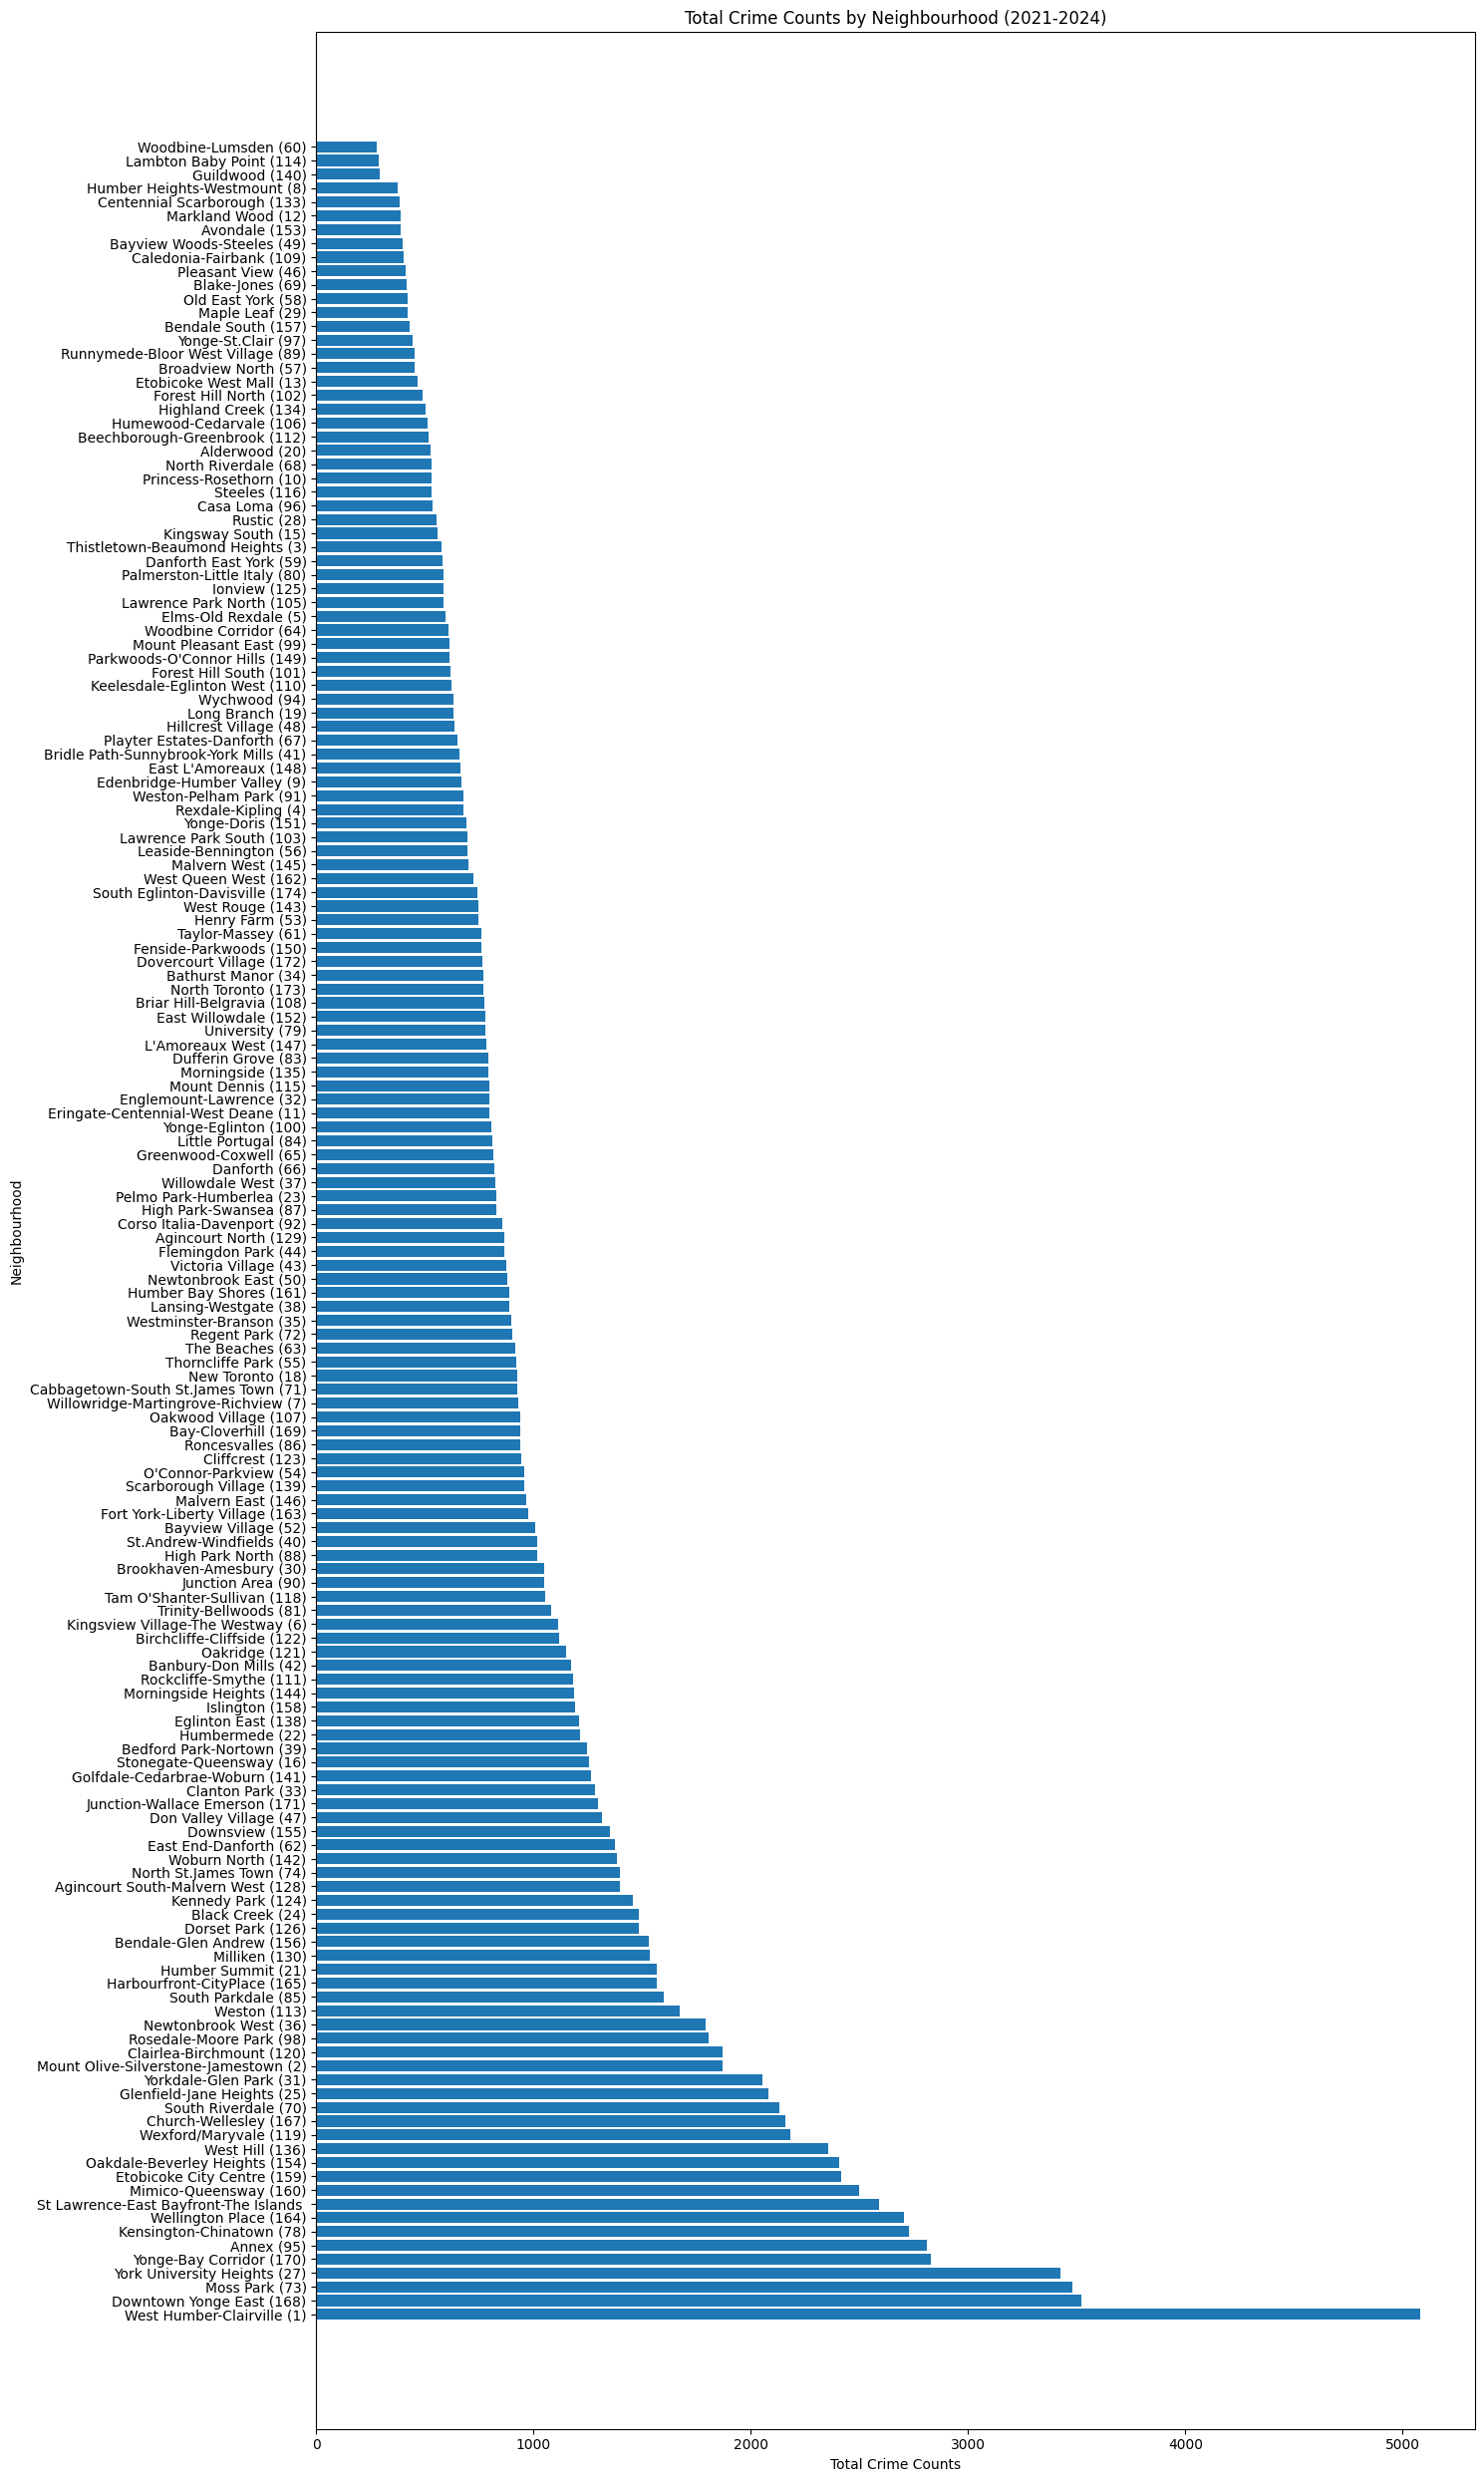

In [43]:
# generate a bar graph with HOOD_158 in X axis and Crime_counts as y.

import matplotlib.pyplot as plt

# Group by HOOD_158 and sum Crime_counts
hood_crime_counts = grouped_counts_all_crimes_with_zeros_short.groupby('HOOD_158', observed=False)['Crime_counts'].sum().reset_index()

# Merge with original dataframe to get NEIGHBOURHOOD_158
hood_crime_counts = hood_crime_counts.merge(df_mci[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates(), on='HOOD_158')

# Sort by Crime_counts in descending order and take the top N (optional)
hood_crime_counts = hood_crime_counts.sort_values(by='Crime_counts', ascending=False) # set this to `True`, to switch order

# Create the bar plot
plt.figure(figsize=(15, 25))
plt.barh(hood_crime_counts['NEIGHBOURHOOD_158'], hood_crime_counts['Crime_counts'])
plt.ylabel('Neighbourhood')
plt.xlabel('Total Crime Counts')
plt.title('Total Crime Counts by Neighbourhood (2021-2024)')
plt.tight_layout()
plt.show()

**As you can see above, this shows that a single neighbourhood heavily outweights all the other neigbourhoods in terms of crime count.**

### What does it mean?

The bar chart provides a visual summary of the total crime counts for each neighbourhood over the period from 2021 to 2024. The length of each bar directly represents the total number of crimes reported in that specific neighbourhood. The fact that "West Humber-Clairville (1)" has the longest bar indicates that it has the highest cumulative number of crime incidents during this period compared to all other neighbourhoods.

In [45]:
grouped_counts_all_crimes_with_zeros_short.Crime_counts.describe()

count    32864.000000
mean         5.201010
std          4.617836
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         48.000000
Name: Crime_counts, dtype: float64

**Lets describe what each of these values mean:**


*   `count`: there are a total of `32,864` entries, which is 52 Weeks x 4 Years x 158 neighbourhoods entries. That gives us a count of crimes per each neighbourhood, per week.
*   `mean`: avg number of crimes per each neighbourhood, per week is `~5.2`
*   `std`: std deviation number of crimes per each neighbourhood, per week is `~4.62`. Which means there is a moderate amount variation in weekly crime count.
*   `min`: there are some neighbourhood weeks with `0` crime counts
*   `25%`: 25% of the neighbourhood-weeks had `2` or fewer crimes
*   `50%`: 50% of the neighbourhood-weeks had `4` or fewer crimes
*   `75%`: 75% of the neighbourhood-weeks had `7` or fewer crimes
*   `max`: The largest amount of crimes commited in a single neighbourhood in a single week is `48`.




In [57]:
# Find the maximum crime count
max_crime_count = grouped_counts_all_crimes_with_zeros_short['Crime_counts'].max()

# Filter the DataFrame to show rows with the maximum crime count
rows_with_max_crime = grouped_counts_all_crimes_with_zeros_short[grouped_counts_all_crimes_with_zeros_short['Crime_counts'] == max_crime_count]

# Display the row(s)
display(rows_with_max_crime)


# Get the HOOD_158 and WEEK_SEQ for the row with the maximum crime count
hood_with_max_crime = rows_with_max_crime['HOOD_158'].iloc[0]
week_with_max_crime = rows_with_max_crime['WEEK_SEQ'].iloc[0]

# Filter the original df_mci DataFrame to show rows that match the neighbourhood and week
detailed_max_crime_data = df_mci[(df_mci['HOOD_158'] == hood_with_max_crime) &
                                 (df_mci['WEEK_SEQ'] == week_with_max_crime)]

# Display the filtered data
display(detailed_max_crime_data)
detailed_max_crime_data['MCI_CATEGORY'].unique()


HOOD_158 WEEK_SEQ  Crime_counts
127      001      128            48

OBJECTID EVENT_UNIQUE_ID           REPORT_DATE              OCC_DATE  \
344712    344713  GO-20231346933  6/12/2023 4:00:00 AM  5/30/2023 4:00:00 AM   
344713    344714  GO-20231346692  6/12/2023 4:00:00 AM   6/5/2023 4:00:00 AM   
344714    344715  GO-20231342056  6/12/2023 4:00:00 AM  6/10/2023 4:00:00 AM   
344749    344750  GO-20231342056  6/12/2023 4:00:00 AM  6/10/2023 4:00:00 AM   
344758    344759  GO-20231347016  6/12/2023 4:00:00 AM   3/2/2023 5:00:00 AM   
344759    344760  GO-20231342388  6/12/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344780    344781  GO-20231342683  6/12/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344781    344782  GO-20231342824  6/12/2023 4:00:00 AM  6/11/2023 4:00:00 AM   
344782    344783  GO-20231342619  6/12/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344826    344827  GO-20231340525  6/12/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344839    344840  GO-20231350951  6/13/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344851    344852  GO-20231357637  6/13/2023 4:00:00 AM  6/13/2023 4:00:00 AM   
344852    344853  GO-20231351311  6/13/2023 4:00:00 AM  6/13/2023 4:00:00 AM   
344854    344855  GO-20231351248  6/13/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344855    344856  GO-20231351526  6/13/2023 4:00:00 AM  6/11/2023 4:00:00 AM   
344859    344860  GO-20231352416  6/13/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
344860    344861  GO-20231355475  6/13/2023 4:00:00 AM  6/11/2023 4:00:00 AM   
345034    345035  GO-20231361752  6/14/2023 4:00:00 AM  6/13/2023 4:00:00 AM   
345041    345042  GO-20231364790  6/14/2023 4:00:00 AM  5/25/2023 4:00:00 AM   
345058    345059  GO-20231360227  6/14/2023 4:00:00 AM  6/13/2023 4:00:00 AM   
345062    345063  GO-20231364790  6/14/2023 4:00:00 AM  5/25/2023 4:00:00 AM   
345075    345076  GO-20231358266  6/14/2023 4:00:00 AM  6/13/2023 4:00:00 AM   
345161    345162  GO-20231368576  6/15/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345172    345173  GO-20231368788  6/15/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345207    345208  GO-20231370683  6/15/2023 4:00:00 AM  6/12/2023 4:00:00 AM   
345215    345216  GO-20231369459  6/15/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345218    345219  GO-20231368576  6/15/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345219    345220  GO-20231369587  6/15/2023 4:00:00 AM  6/14/2023 4:00:00 AM   
345220    345221  GO-20231369050  6/15/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345236    345237  GO-20231373147  6/15/2023 4:00:00 AM   6/2/2023 4:00:00 AM   
345237    345238  GO-20231373064  6/15/2023 4:00:00 AM   6/3/2023 4:00:00 AM   
345245    345246  GO-20231376832  6/15/2023 4:00:00 AM   6/6/2023 4:00:00 AM   
345309    345310  GO-20231381811  6/16/2023 4:00:00 AM  6/10/2023 4:00:00 AM   
345320    345321  GO-20231382845  6/16/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345322    345323  GO-20231378893  6/16/2023 4:00:00 AM  6/11/2023 4:00:00 AM   
345327    345328  GO-20231385732  6/16/2023 4:00:00 AM   6/8/2023 4:00:00 AM   
345328    345329  GO-20231384912  6/16/2023 4:00:00 AM  6/16/2023 4:00:00 AM   
345436    345437  GO-20231394699  6/17/2023 4:00:00 AM  6/17/2023 4:00:00 AM   
345437    345438  GO-20231388202  6/17/2023 4:00:00 AM  6/17/2023 4:00:00 AM   
345438    345439  GO-20231389122  6/17/2023 4:00:00 AM  6/15/2023 4:00:00 AM   
345510    345511  GO-20231387151  6/17/2023 4:00:00 AM  6/17/2023 4:00:00 AM   
345534    345535  GO-20231402573  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345587    345588  GO-20231401498  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345588    345589  GO-20231397343  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345593    345594  GO-20231395544  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345597    345598  GO-20231395474  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345600    345601  GO-20231395474  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   
345609    345610  GO-20231395544  6/18/2023 4:00:00 AM  6/18/2023 4:00:00 AM   

        REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  \
344712         

array(['Auto Theft', 'Break and Enter', 'Assault', 'Robbery'],
      dtype=object)

 > * I have taken the neighbourhood-week with the highest crime count and created a detailed view of that neighbourhood in that week (June 12th, 2023 - June 18th, 2023).
 * The point of interest is that, out of the five types of crime categories, all but one was committed.
 * The only type of crime excluded was `Theft Over` which refers to  *any theft over the value of $5000 (CAD)*.
 >
 > * **Why is this interesting?** When comparing this with the neighbourhood profiles, it would be interesting to see where in the avg. household income this neigbourhood will be.
 >* As per this data it suggests that `West Humber-Clairville (1)` would be in the lower end. (at least for the year 2023)

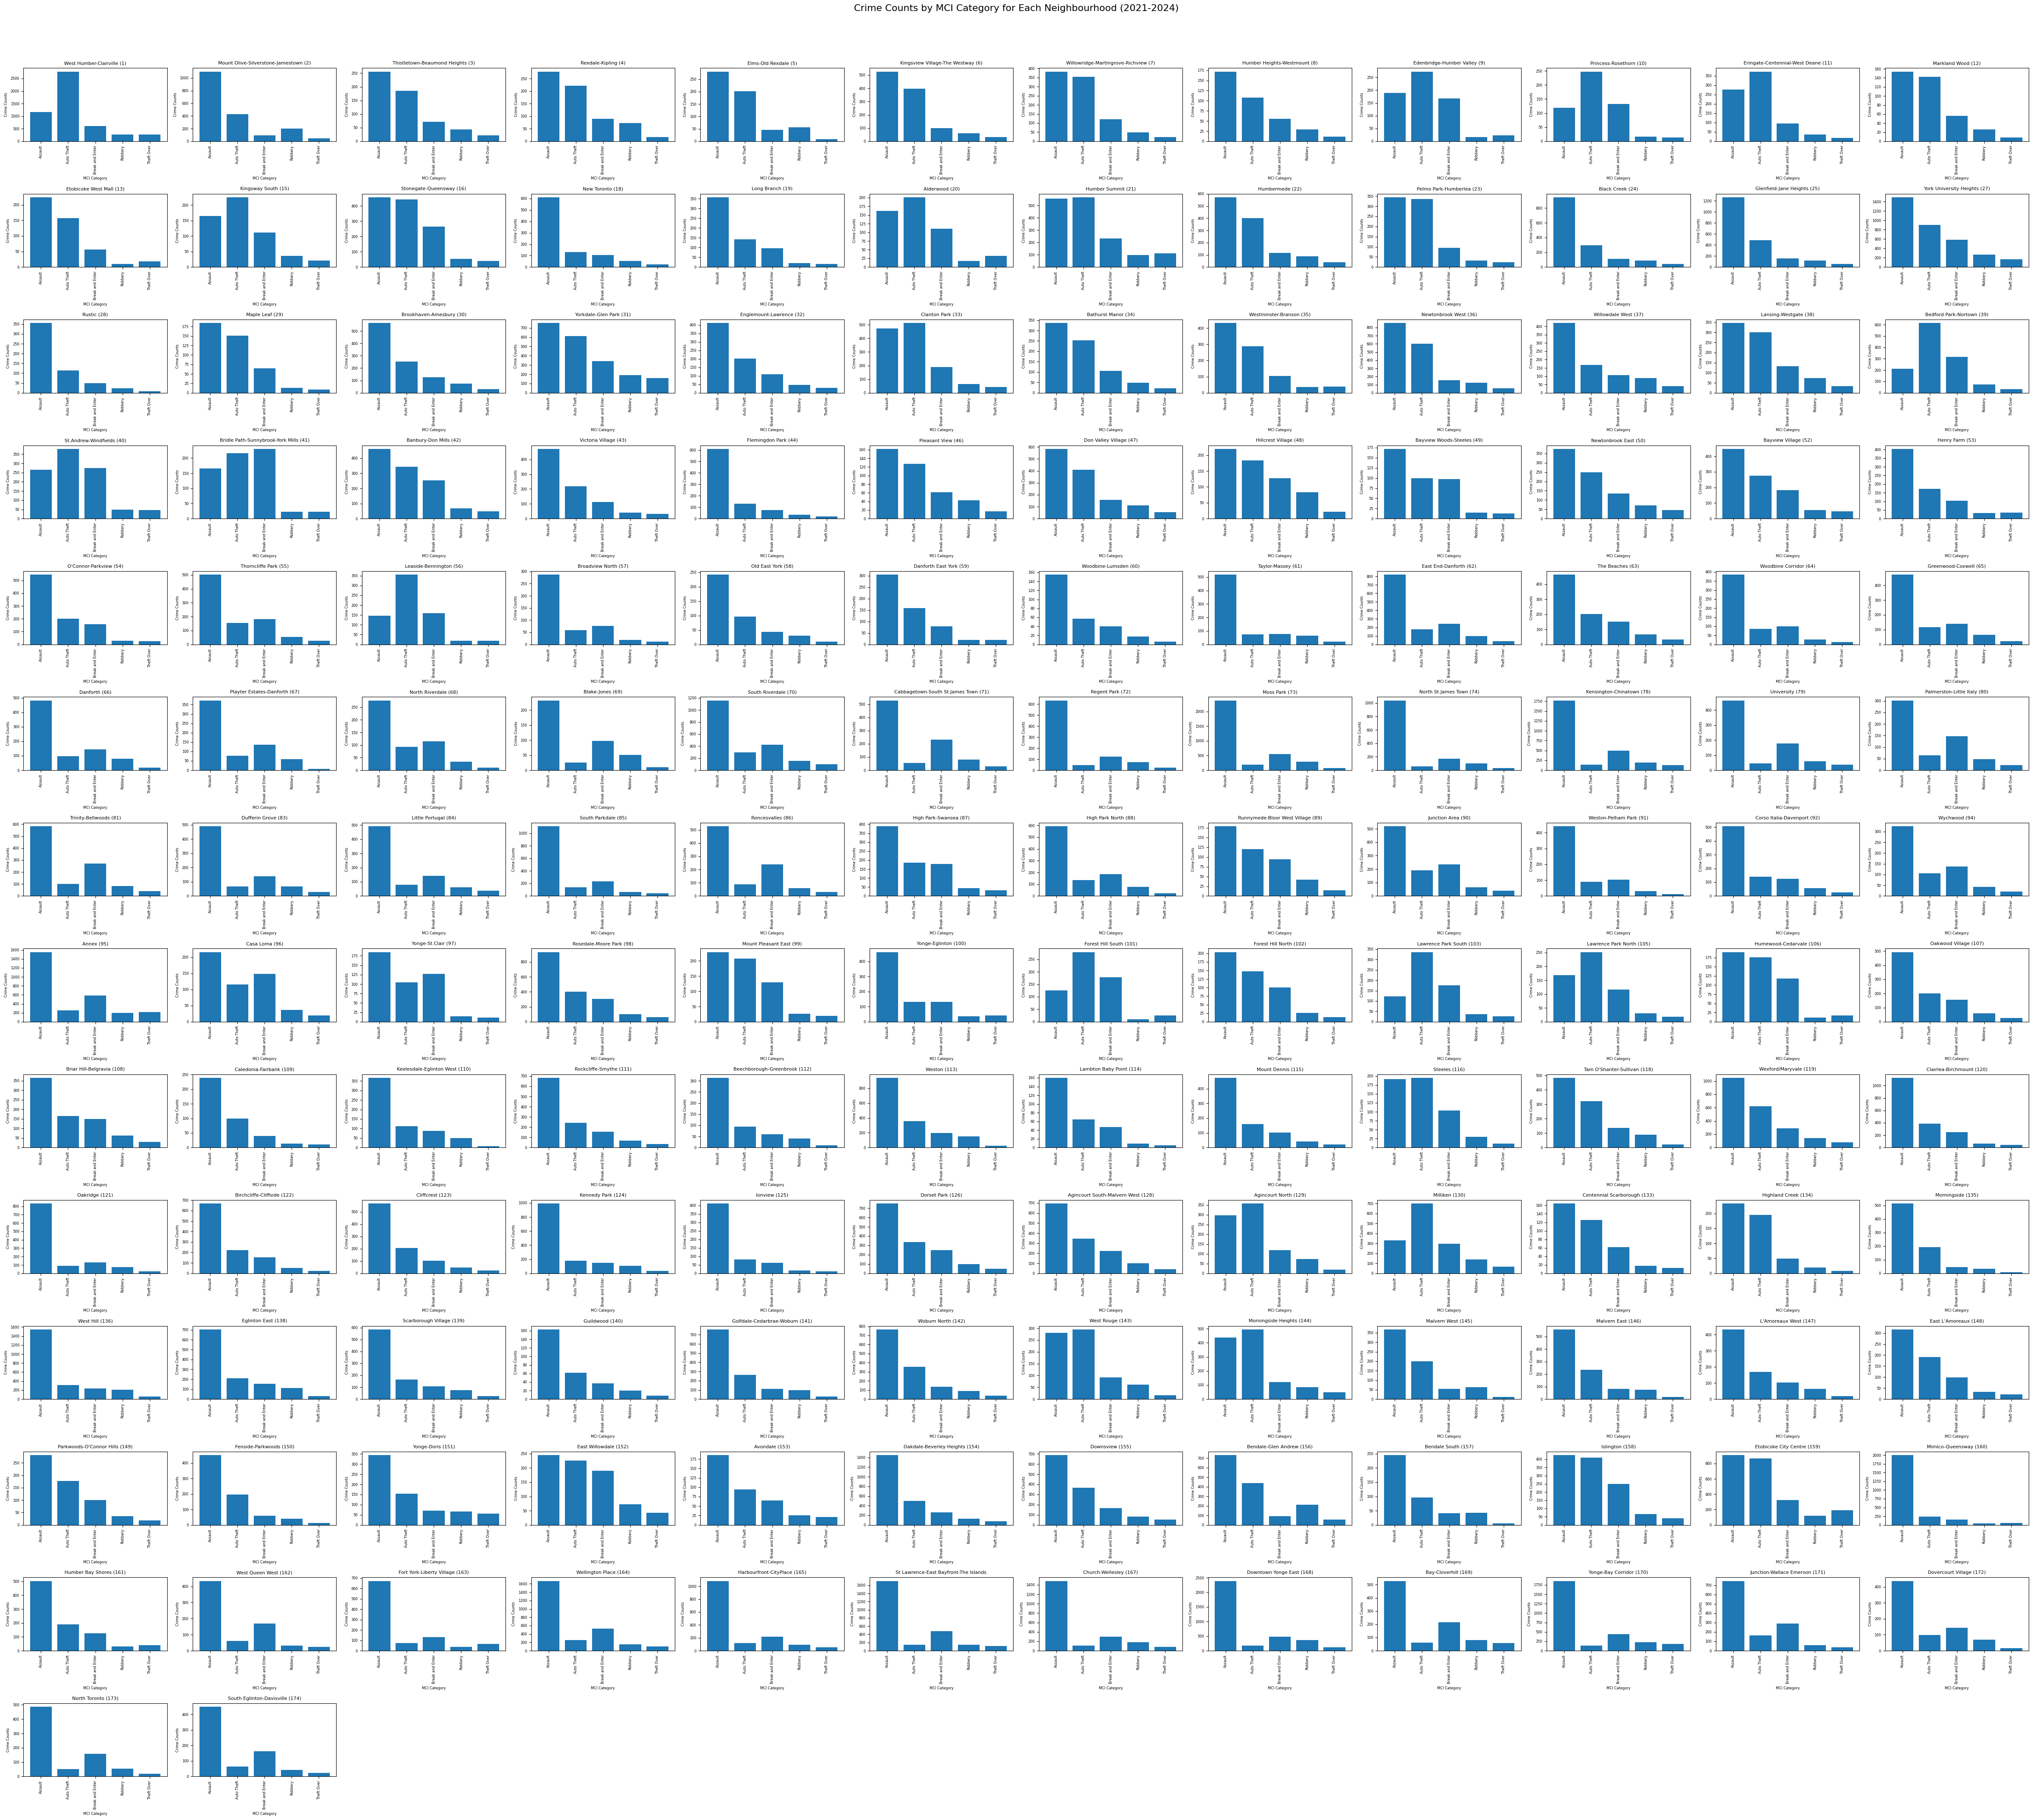

In [60]:
import matplotlib.pyplot as plt
# Group by HOOD_158 and MCI_CATEGORY and sum Crime_counts
hood_mci_crime_counts = grouped_counts_mci_categories_with_zeros_short.groupby(['HOOD_158', 'MCI_CATEGORY'], observed=False)['Crime_counts'].sum().reset_index()

# Get unique HOOD_158 values
unique_hoods = hood_mci_crime_counts['HOOD_158'].unique()

# Determine the number of rows and columns for the grid
num_hoods = len(unique_hoods)
cols = 12
rows = (num_hoods + cols - 1) // cols

# Create the figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Add a main title to the figure
fig.suptitle('Crime Counts by MCI Category for Each Neighbourhood (2021-2024)', fontsize=16, y=1.02) # Add suptitle here

# Merge with original dataframe to get NEIGHBOURHOOD_158 names
hood_names = df_mci[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates()

# Iterate through each unique hood and generate a bar graph
for i, hood in enumerate(unique_hoods):
  ax = axes[i]
  hood_data = hood_mci_crime_counts[hood_mci_crime_counts['HOOD_158'] == hood]

  # Get the corresponding neighbourhood name
  neighbourhood_name = hood_names[hood_names['HOOD_158'] == hood]['NEIGHBOURHOOD_158'].iloc[0]

  ax.bar(hood_data['MCI_CATEGORY'], hood_data['Crime_counts'])
  ax.set_title(f'{neighbourhood_name}', fontsize=8) # Set the title to the neighbourhood name and reduce font size
  ax.set_xlabel('MCI Category', fontsize=6) # Reduce font size
  ax.set_ylabel('Crime Counts', fontsize=6) # Reduce font size
  ax.tick_params(axis='x', rotation=90, labelsize=6) # Rotate and reduce font size for x-axis labels
  ax.tick_params(axis='y', labelsize=6) # Reduce font size for y-axis labels


# Hide any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



> **This confirms two assumptions:**
> 1.   The data needs to be normalized, as some neighbourhood's high crime count skew the others that aren't as high. This disparity makes direct comparisons of crime risk difficult without considering factors like population. Normalizing or standardizing the data (e.g., calculating crime rate per capita) would be a crucial next step for a fair comparison.
>
> 2.   The most common type of crime committed seems to be `Assault`. Let's prove this quantatively below.







In [62]:
# Calculate the total count for each MCI_CATEGORY across all neighbourhoods
total_counts = grouped_counts_mci_categories_with_zeros_short.groupby('MCI_CATEGORY', observed=False)['Crime_counts'].sum()

# Sort them to see which category has the highest overall number of incidents.
total_counts.sort_values(ascending=False)

# Display the sorted counts based on the MCI Category
print(total_counts)


MCI_CATEGORY
Assault            89397
Auto Theft         38113
Break and Enter    26079
Robbery            11266
Theft Over          6071
Name: Crime_counts, dtype: int64


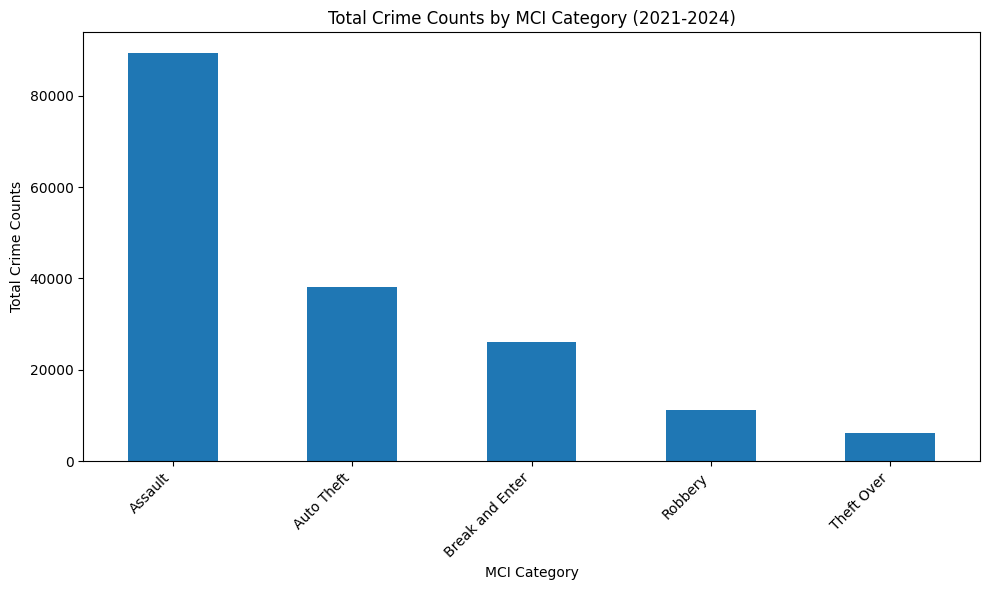

In [63]:
import matplotlib.pyplot as plt

# Sort the total counts in descending order for better visualization
sorted_total_counts = total_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sorted_total_counts.plot(kind='bar')

plt.title('Total Crime Counts by MCI Category (2021-2024)')
plt.xlabel('MCI Category')
plt.ylabel('Total Crime Counts')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()



> As seen above, `Assault` far outweights any other type of crime. We will need to fix this with normalization.



In [88]:
# Lets import the neighbourhood-profiles-2021-158-model data
df_neighbourhood_profiles = pd.read_excel('neighbourhood-profiles-2021-158-model(1).xlsx')

# what is the shape of the data frame
df_neighbourhood_profiles.shape

(2603, 159)

In [89]:
df_neighbourhood_profiles.head(10)

Neighbourhood Name  \
0                               Neighbourhood Number   
1                              TSNS 2020 Designation   
2  Total - Age groups of the population - 25% sam...   
3                                      0 to 14 years   
4                                       0 to 4 years   
5                                       5 to 9 years   
6                                     10 to 14 years   
7                                     15 to 64 years   
8                                     15 to 19 years   
9                                     20 to 24 years   

                 West Humber-Clairville Mount Olive-Silverstone-Jamestown  \
0                                     1                                 2   
1  Not an NIA or Emerging Neighbourhood    Neighbourhood Improvement Area   
2                                 33300                             31345   
3                                  4295                              5690   
4                                  1460                              1650   
5                                  1345                              1860   
6                                  1485                              2175   
7                                 23640                             21490   
8                                  1860                              2280   
9                                  3175                              2675   

     Thistletown-Beaumond Heights                       Rexdale-Kipling  \
0                               3                                     4   
1  Neighbourhood Improvement Area  Not an NIA or Emerging Neighbourhood   
2                            9850                                 10375   
3                            1495                                  1575   
4                             505                                   505   
5                             540                                   615   
6                             455                                   455   
7                            6615                                  6950   
8                             570                                   515   
9                             745                                   715   

                 Elms-Old Rexdale   Kingsview Village-The Westway  \
0                               5                               6   
1  Neighbourhood Improvement Area  Neighbourhood Improvement Area   
2                            9355                           22005   
3                            1610                            3915   
4                             440                            1245   
5                             480                            1325   
6                             685                            1350   
7                            6355                           14385   
8                             635                            1245   
9                             685                            1605   

       Willowridge-Martingrove-Richview Humber Heights-Westmount  \
0                                     7                        8   
1  Not an NIA or Emerging Neighbourhood   Emerging Neighbourhood   
2                                 22445                    10005   
3                                  3500                     1370   
4                                  1065                      395   
5                                  1190                      430   
6                                  1240                      540   
7                                 13865                     6245   
8                                  1175                      525   
9                                  1330                      580   

               Edenbridge-Humber Valley  ...  \
0                                     9  ...   
1  Not an NIA or Emerging Neighbourhood  ...   
2                                 15190  ...   
3                                  2070  .

In [90]:
# We want to tranpose the table such that the first column values become the header
df_neighbourhood_profiles = df_neighbourhood_profiles.transpose()

# Set the first row as the new header
new_header = df_neighbourhood_profiles.iloc[0]
df_neighbourhood_profiles = df_neighbourhood_profiles[1:]
df_neighbourhood_profiles.columns = new_header

# Display the first few rows with the correct headers
display(df_neighbourhood_profiles.head())

Neighbourhood Name                Neighbourhood Number  \
West Humber-Clairville                               1   
Mount Olive-Silverstone-Jamestown                    2   
Thistletown-Beaumond Heights                         3   
Rexdale-Kipling                                      4   
Elms-Old Rexdale                                     5   

Neighbourhood Name                                TSNS 2020 Designation  \
West Humber-Clairville             Not an NIA or Emerging Neighbourhood   
Mount Olive-Silverstone-Jamestown        Neighbourhood Improvement Area   
Thistletown-Beaumond Heights             Neighbourhood Improvement Area   
Rexdale-Kipling                    Not an NIA or Emerging Neighbourhood   
Elms-Old Rexdale                         Neighbourhood Improvement Area   

Neighbourhood Name                Total - Age groups of the population - 25% sample data  \
West Humber-Clairville                                                         33300       
Mount Olive-Silverstone-Jamestown                                              31345       
Thistletown-Beaumond Heights                                                    9850       
Rexdale-Kipling                                                                10375       
Elms-Old Rexdale                                                                9355       

Neighbourhood Name                  0 to 14 years     0 to 4 years  \
West Humber-Clairville                       4295             1460   
Mount Olive-Silverstone-Jamestown            5690             1650   
Thistletown-Beaumond Heights                 1495              505   
Rexdale-Kipling                              1575              505   
Elms-Old Rexdale                             1610              440   

Neighbourhood Name                    5 to 9 years     10 to 14 years  \
West Humber-Clairville                        1345               1485   
Mount Olive-Silverstone-Jamestown             1860               2175   
Thistletown-Beaumond Heights                   540                455   
Rexdale-Kipling                                615                455   
Elms-Old Rexdale                               480                685   

Neighbourhood Name                  15 to 64 years     15 to 19 years  \
West Humber-Clairville                       23640               1860   
Mount Olive-Silverstone-Jamestown            21490               2280   
Thistletown-Beaumond Heights                  6615                570   
Rexdale-Kipling                               6950                515   
Elms-Old Rexdale                              6355                635   

Neighbourhood Name                    20 to 24 years  ...  \
West Humber-Clairville                          3175  ...   
Mount Olive-Silverstone-Jamestown               2675  ...   
Thistletown-Beaumond Heights                     745  ...   
Rexdale-Kipling                                  715  ...   
Elms-Old Rexdale                                 685  ...   

Neighbourhood Name                  Between 9 a.m. and 11:59 a.m.  \
West Humber-Clairville                                       1665   
Mount Olive-Silverstone-Jamestown                            1145   
Thistletown-Beaumond Heights                                  395   
Rexdale-Kipling                                               425   
Elms-Old Rexdale                                              355   

Neighbourhood Name                  Between 12 p.m. and 4:59 a.m.  \
West Humber-Clairville                                       2935   
Mount Olive-Silverstone-Jamestown                            2965   
Thistletown-Beaumond Heights                                  635   
Rexdale-Kipling                                               775   
Elms-Old Rexdale                                              675   

Neighbourhood Name                Total - Eligibility for instruction in the minority official language for the population in private households born i

In [95]:
df_neighbourhood_profiles.shape

(158, 2603)

In [99]:
# Check for null values in each column and sum them
null_counts = df_neighbourhood_profiles.isnull().sum()

# Display the columns with their null counts
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [100]:
# Select the Neighbourhood Number and Total Population columns
df_population = df_neighbourhood_profiles[['Neighbourhood Number', 'Total - Age groups of the population - 25% sample data']].copy()

# Rename the population column for clarity
df_population = df_population.rename(columns={'Total - Age groups of the population - 25% sample data': 'Population_2021'})

# Display the first few rows of the new DataFrame
display(df_population.head())

Neighbourhood Name                Neighbourhood Number Population_2021
West Humber-Clairville                               1           33300
Mount Olive-Silverstone-Jamestown                    2           31345
Thistletown-Beaumond Heights                         3            9850
Rexdale-Kipling                                      4           10375
Elms-Old Rexdale                                     5            9355

In [110]:
# Convert 'Neighbourhood Number' to string and pad with leading zeros to match 'HOOD_158' format
df_population['Neighbourhood Number'] = df_population['Neighbourhood Number'].astype(str).str.zfill(3)

# Now attempt the merge again with the corrected 'Neighbourhood Number' format
df_crime_population = grouped_counts_all_crimes_with_zeros_short.merge(
    df_population,
    left_on='HOOD_158',  # Column in grouped_counts_all_crimes_with_zeros_short
    right_on='Neighbourhood Number',  # Column in df_population
    how='inner' # Use an inner merge to keep only matching neighbourhoods
)

# Drop the redundant 'Neighbourhood Number' column after merging
df_crime_population = df_crime_population.drop('Neighbourhood Number', axis=1)

# Display the first few rows and shape of the merged DataFrame
display(df_crime_population.head())
print(df_crime_population.shape)

HOOD_158 WEEK_SEQ  Crime_counts Population_2021
0      001        1            19           33300
1      001        2            11           33300
2      001        3            12           33300
3      001        4            20           33300
4      001        5            12           33300

(32864, 4)


In [112]:
# Calculate the crime rate per 1,000 people
df_crime_population['Crime_Rate_Per_1000'] = (df_crime_population['Crime_counts'] / df_crime_population['Population_2021']) * 1000

# Display the first few rows with the new crime rate column
display(df_crime_population.head())

HOOD_158 WEEK_SEQ  Crime_counts Population_2021 Crime_Rate_Per_1000
0      001        1            19           33300            0.570571
1      001        2            11           33300             0.33033
2      001        3            12           33300             0.36036
3      001        4            20           33300            0.600601
4      001        5            12           33300             0.36036

## Normalized View of Crimes per 1000 people per Neighbourhood

> provides a more equitable comparison of crime levels across different areas, taking into account their populations.

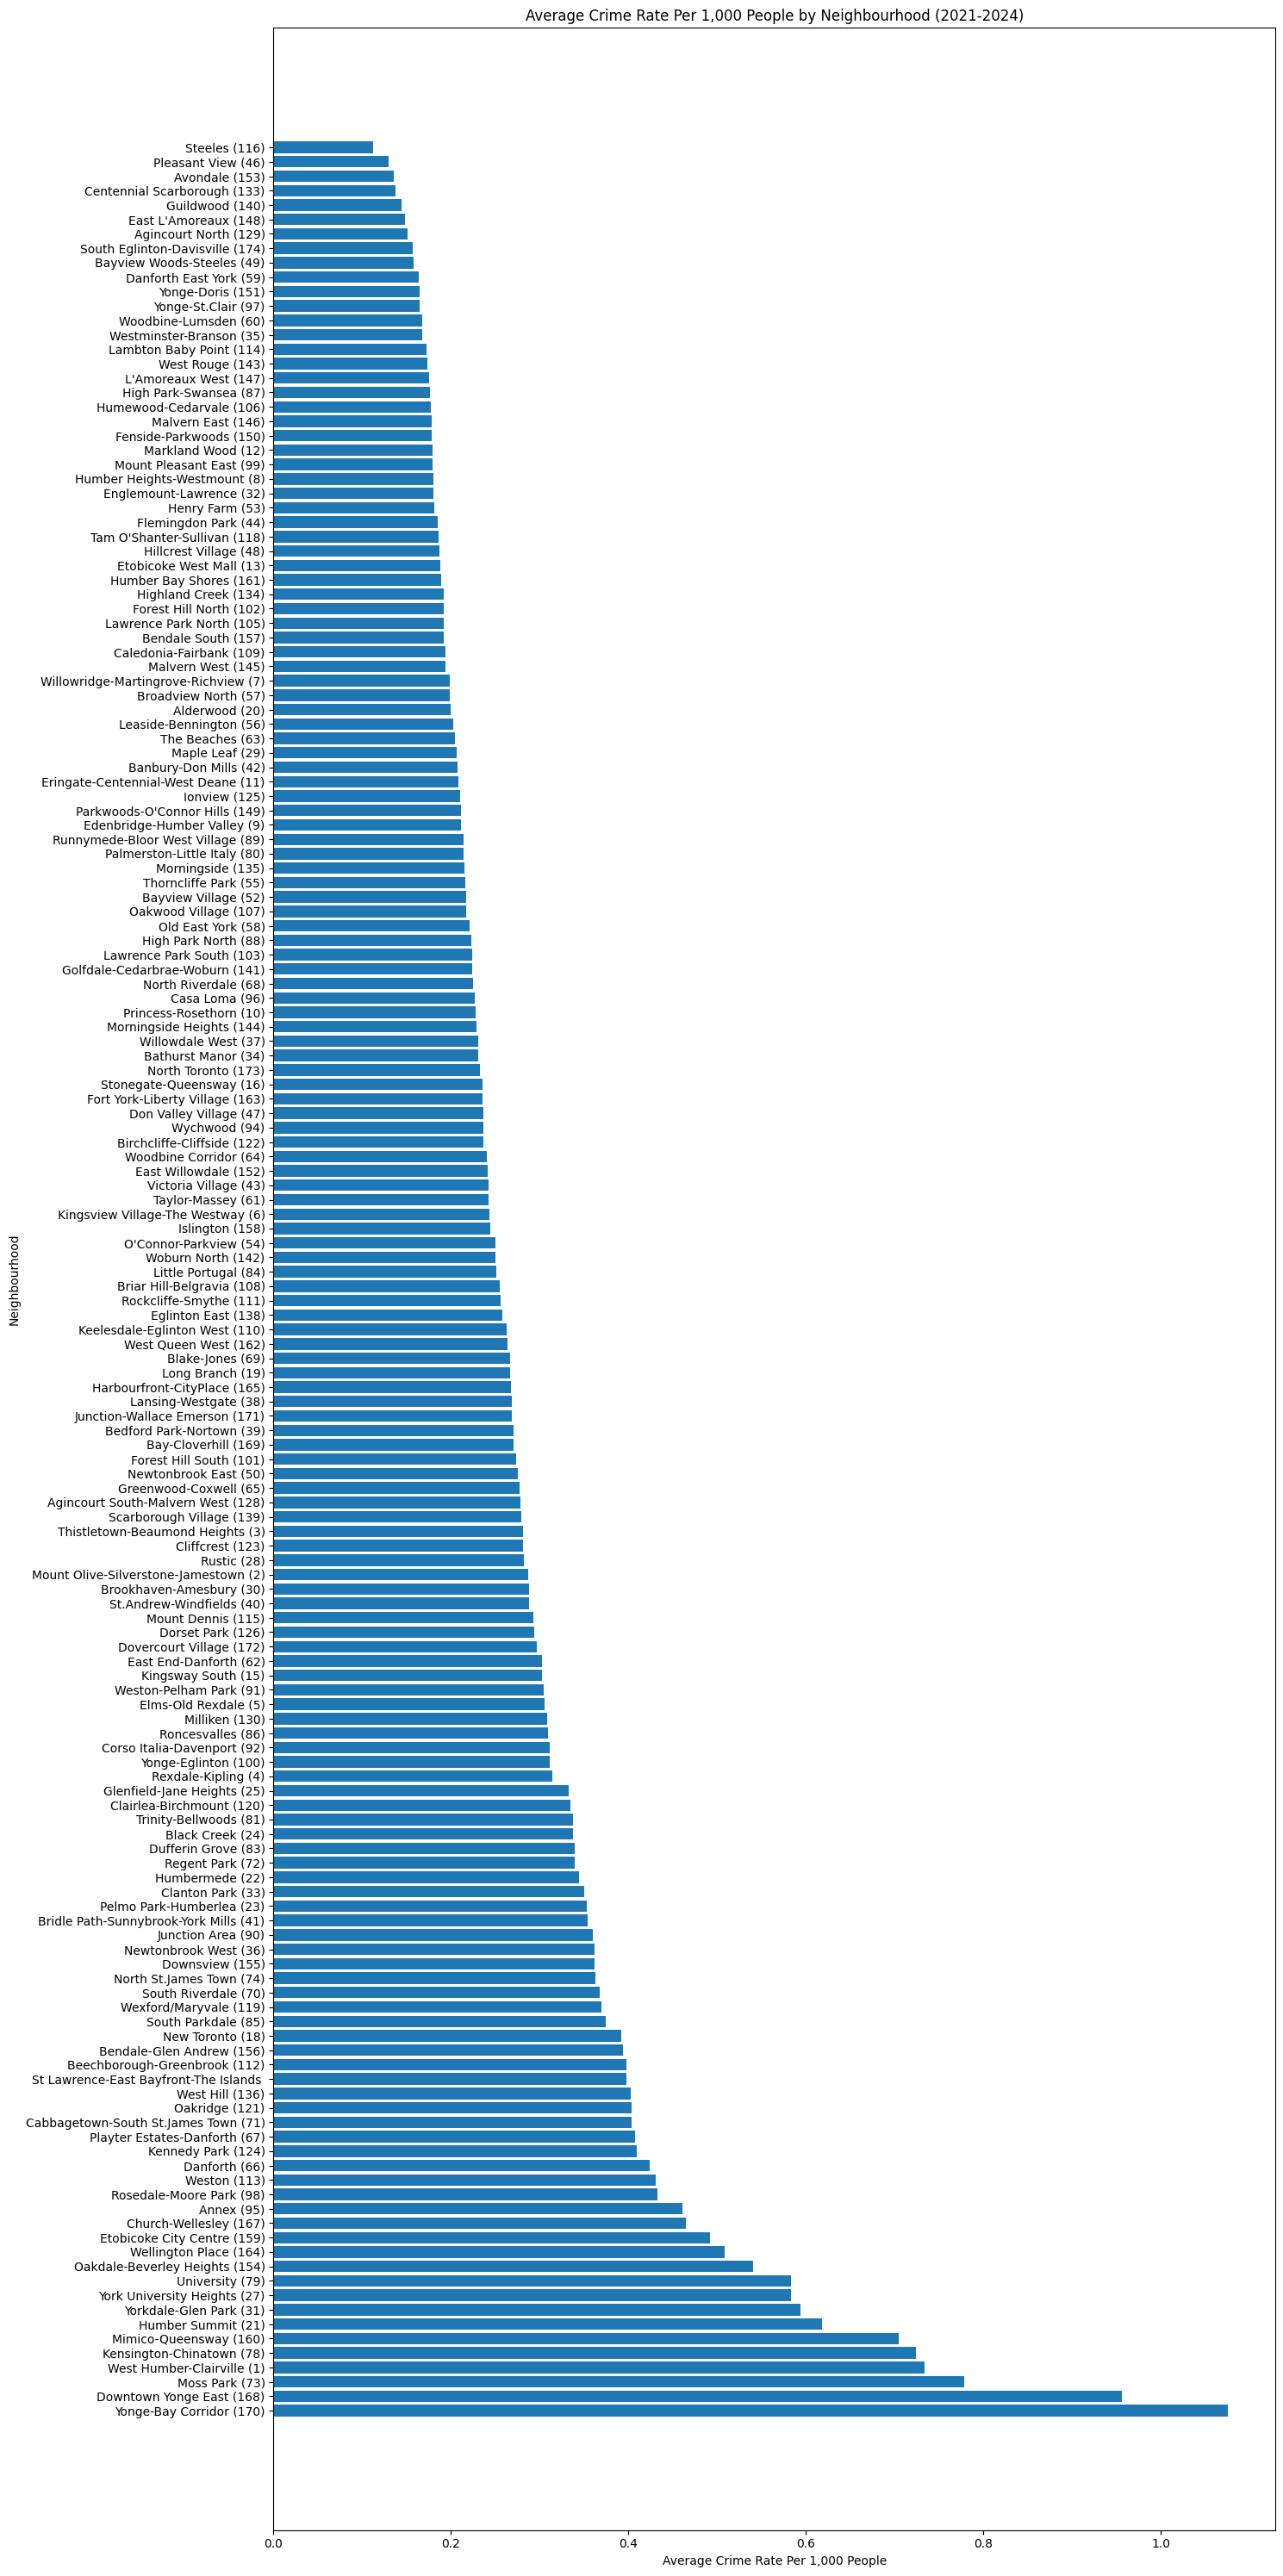

In [116]:
import matplotlib.pyplot as plt

# Group by HOOD_158 and calculate the average Crime_Rate_Per_1000
hood_crime_rate = df_crime_population.groupby('HOOD_158', observed=False)['Crime_Rate_Per_1000'].mean().reset_index()

# Merge with original dataframe to get NEIGHBOURHOOD_158 names
# Assuming df_mci is still available in the environment
hood_names = df_mci[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates()
hood_crime_rate = hood_crime_rate.merge(hood_names, on='HOOD_158')


# Sort by Crime_Rate_Per_1000 in descending order
hood_crime_rate = hood_crime_rate.sort_values(by='Crime_Rate_Per_1000', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(15, 30)) # Adjust figure size for horizontal plot
plt.barh(hood_crime_rate['NEIGHBOURHOOD_158'], hood_crime_rate['Crime_Rate_Per_1000']) # Use barh for horizontal bars
plt.xlabel('Average Crime Rate Per 1,000 People') # X-axis is now average crime rate
plt.ylabel('Neighbourhood') # Y-axis is now neighbourhoods
plt.title('Average Crime Rate Per 1,000 People by Neighbourhood (2021-2024)')
plt.tight_layout()
plt.show()


# **Summary of Changes:**
   1. Loaded and initially processed the crime data.
   2. Cleaned the data by removing partial weeks and unknown neighbourhoods.
   3. Aggregated weekly crime counts by neighbourhood and crime category.
   4. Identified the most common crime category ("Assault").
   5. Loaded and processed neighbourhood population data.
   6. Merged crime data with population data.
   7.  Calculated the crime rate per 1,000 people.
   8. Visualized the average crime rate per 1,000 people by neighbourhood.


## **Identify High-Risk Neighbourhoods based on Rate**

> Let's compare the list of neighbourhoods with the highest raw crime counts to those with the highest crime rates to see how normalization changed the ranking.

In [118]:
# Select the top 20 neighbourhoods by total raw crime counts
top_raw_crime = hood_crime_counts.head(20).reset_index(drop=True)

# Select the top 20 neighbourhoods by average crime rate per 1,000 people
top_crime_rate = hood_crime_rate.head(20).reset_index(drop=True)

# Display the two lists side-by-side for comparison
print("Top 20 Neighbourhoods by Total Raw Crime Counts (2021-2024)")
display(top_raw_crime[['NEIGHBOURHOOD_158', 'Crime_counts']])

print("\nTop 20 Neighbourhoods by Average Crime Rate Per 1,000 People (2021-2024)")
display(top_crime_rate[['NEIGHBOURHOOD_158', 'Crime_Rate_Per_1000']])

Top 20 Neighbourhoods by Total Raw Crime Counts (2021-2024)


NEIGHBOURHOOD_158  Crime_counts
0               West Humber-Clairville (1)          5079
1                Downtown Yonge East (168)          3519
2                           Moss Park (73)          3480
3             York University Heights (27)          3426
4                 Yonge-Bay Corridor (170)          2828
5                               Annex (95)          2808
6                Kensington-Chinatown (78)          2728
7                   Wellington Place (164)          2705
8   St Lawrence-East Bayfront-The Islands           2590
9                   Mimico-Queensway (160)          2499
10             Etobicoke City Centre (159)          2414
11          Oakdale-Beverley Heights (154)          2408
12                         West Hill (136)          2356
13                  Wexford/Maryvale (119)          2180
14                  Church-Wellesley (167)          2157
15                    South Riverdale (70)          2129
16             Glenfield-Jane Heights (25)          2079
17                 Yorkdale-Glen Park (31)          2055
18   Mount Olive-Silverstone-Jamestown (2)          1870
19               Clairlea-Birchmount (120)          1868


Top 20 Neighbourhoods by Average Crime Rate Per 1,000 People (2021-2024)


NEIGHBOURHOOD_158 Crime_Rate_Per_1000
0         Yonge-Bay Corridor (170)             1.07522
1        Downtown Yonge East (168)            0.955834
2                   Moss Park (73)            0.778537
3       West Humber-Clairville (1)            0.733281
4        Kensington-Chinatown (78)            0.723807
5           Mimico-Queensway (160)            0.704865
6               Humber Summit (21)            0.617878
7          Yorkdale-Glen Park (31)            0.594274
8     York University Heights (27)            0.582947
9                  University (79)            0.582751
10  Oakdale-Beverley Heights (154)            0.540473
11          Wellington Place (164)            0.508596
12     Etobicoke City Centre (159)             0.49177
13          Church-Wellesley (167)            0.464614
14                      Annex (95)            0.460751
15        Rosedale-Moore Park (98)            0.432405
16                    Weston (113)            0.430697
17                   Danforth (66)            0.423676
18              Kennedy Park (124)            0.409679
19   Playter Estates-Danforth (67)            0.407527



> **Point of Interest:**
>
> * "West Humber-Clairville (1)" is ranked #1 by total raw crime counts but drops to #4 when considering the crime rate per 1,000 people.
> * Conversely, "Yonge-Bay Corridor (170)" is ranked #5 by raw counts but jumps to #1 in terms of crime rate.



# Task
Analyze crime rates by category and crime rate trends over time using the provided data.

## Normalize crime rates by category

### Subtask:
Merge the crime counts by neighbourhood, week, and category with the population data, calculate crime rates by category per neighbourhood per week, and then aggregate to get the average crime rate per category per neighbourhood. Visualize the results.


**Reasoning**:
Merge the crime counts by neighbourhood, week, and category with the population data, calculate crime rates by category per neighbourhood per week, aggregate to get the average crime rate per category per neighbourhood, and then visualize the results for each crime category.



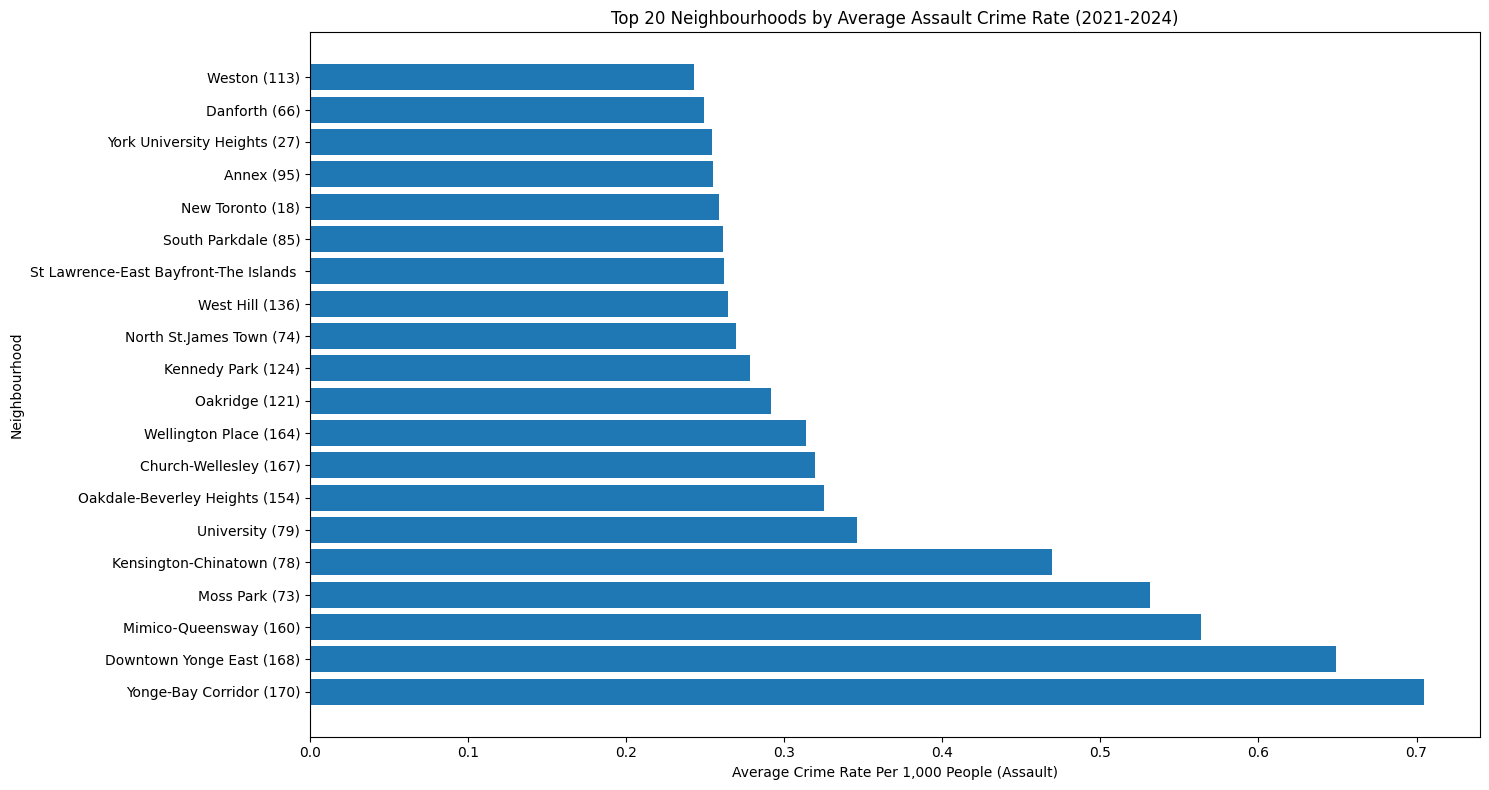

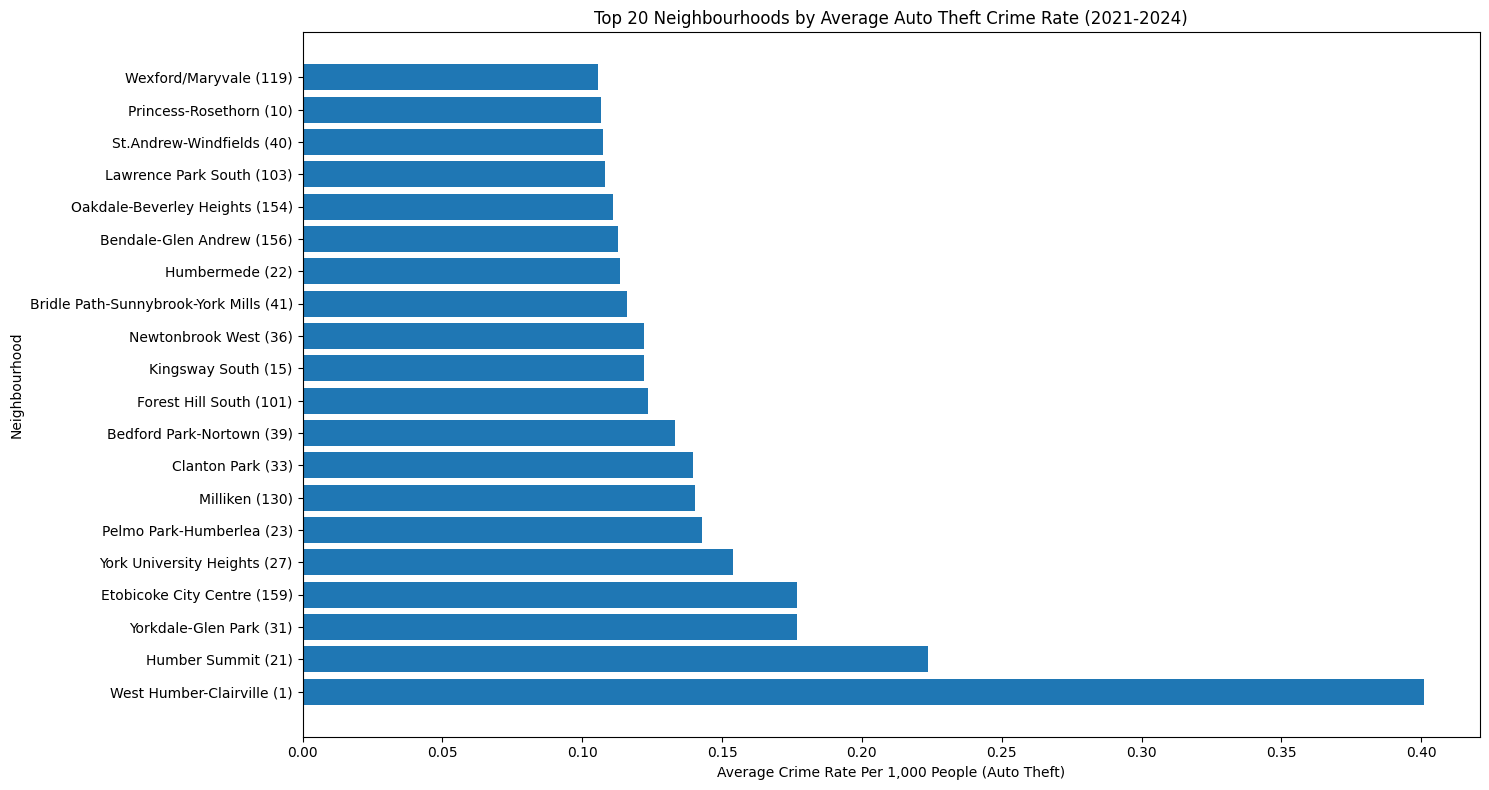

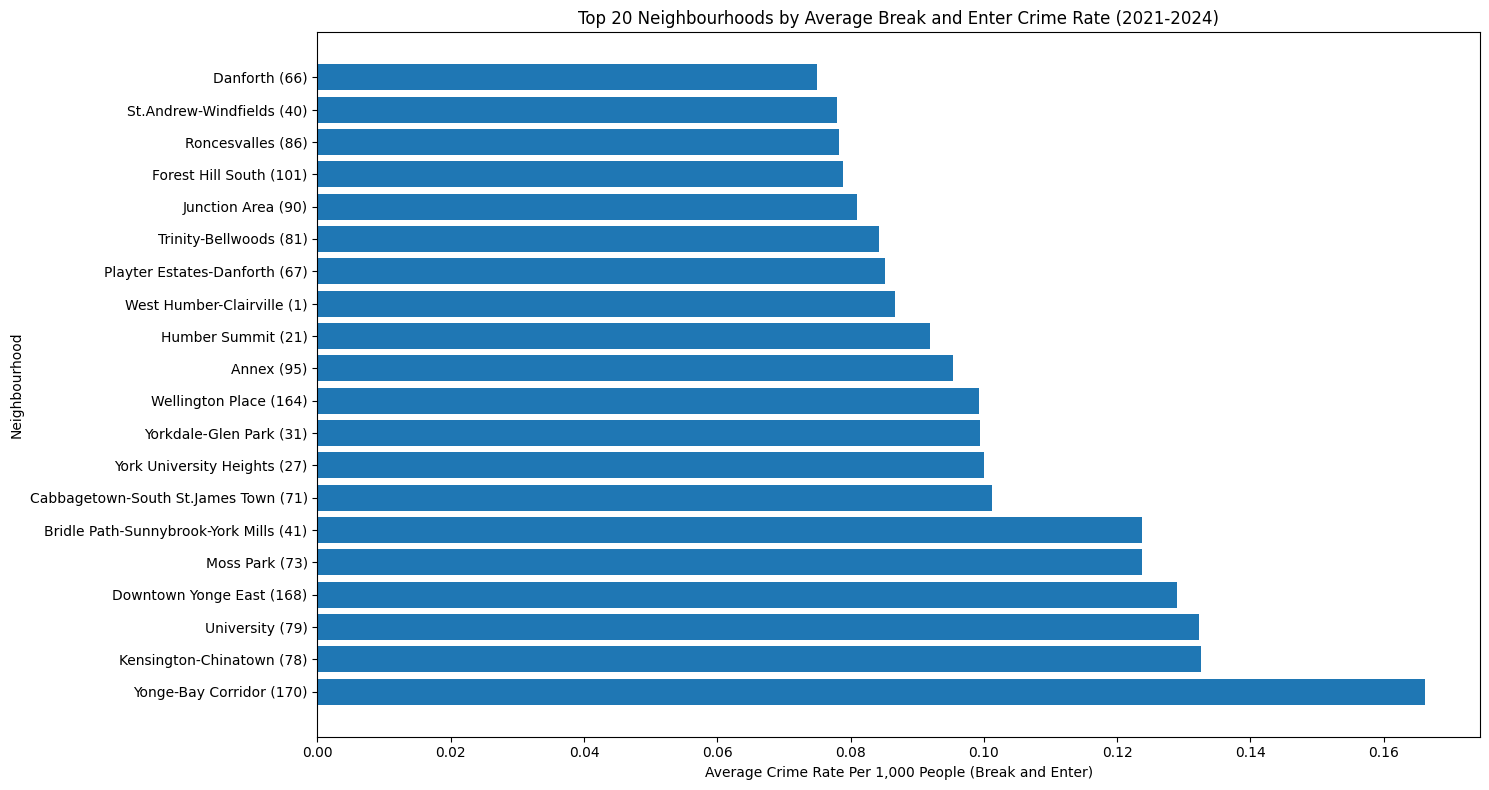

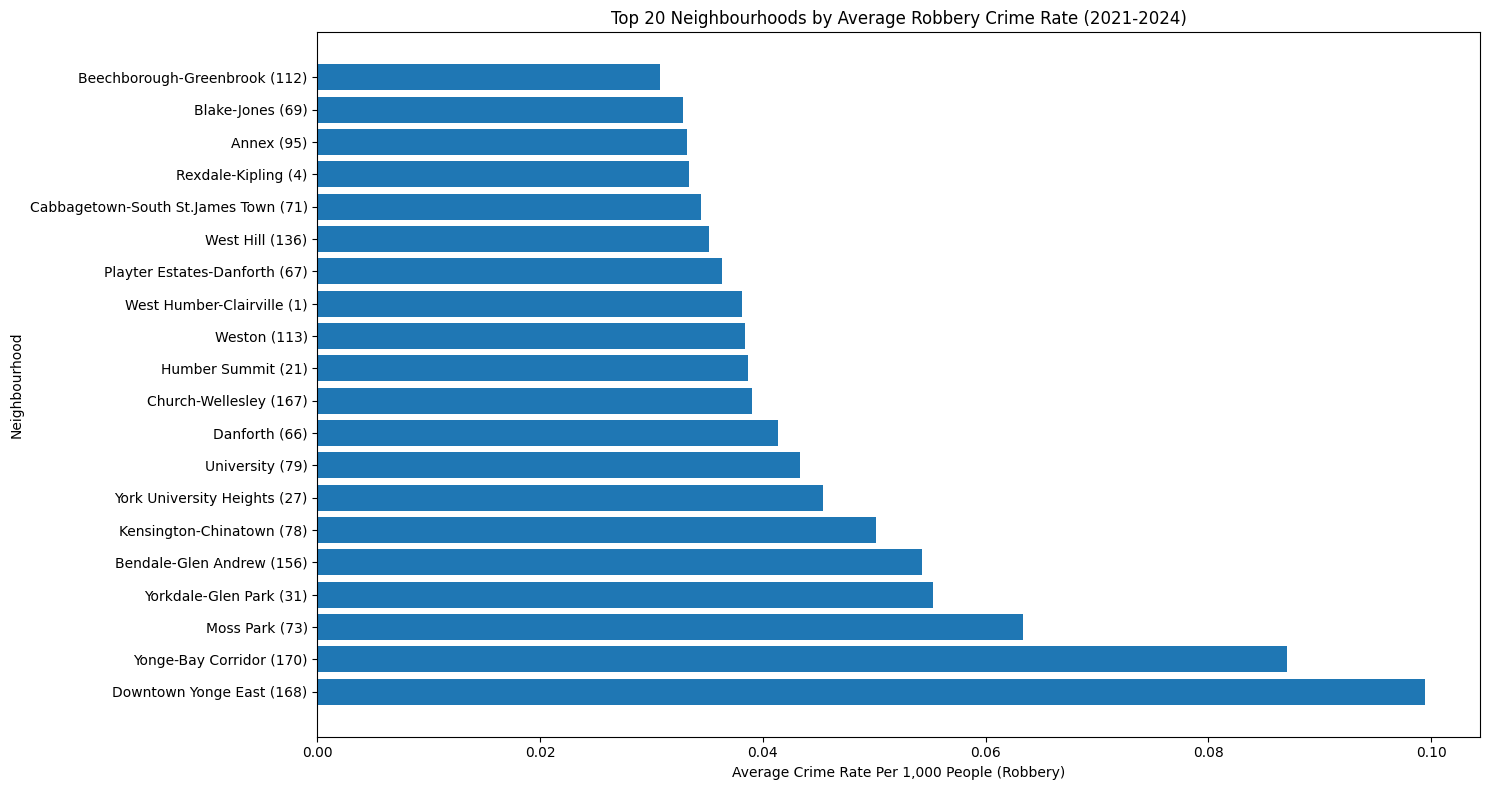

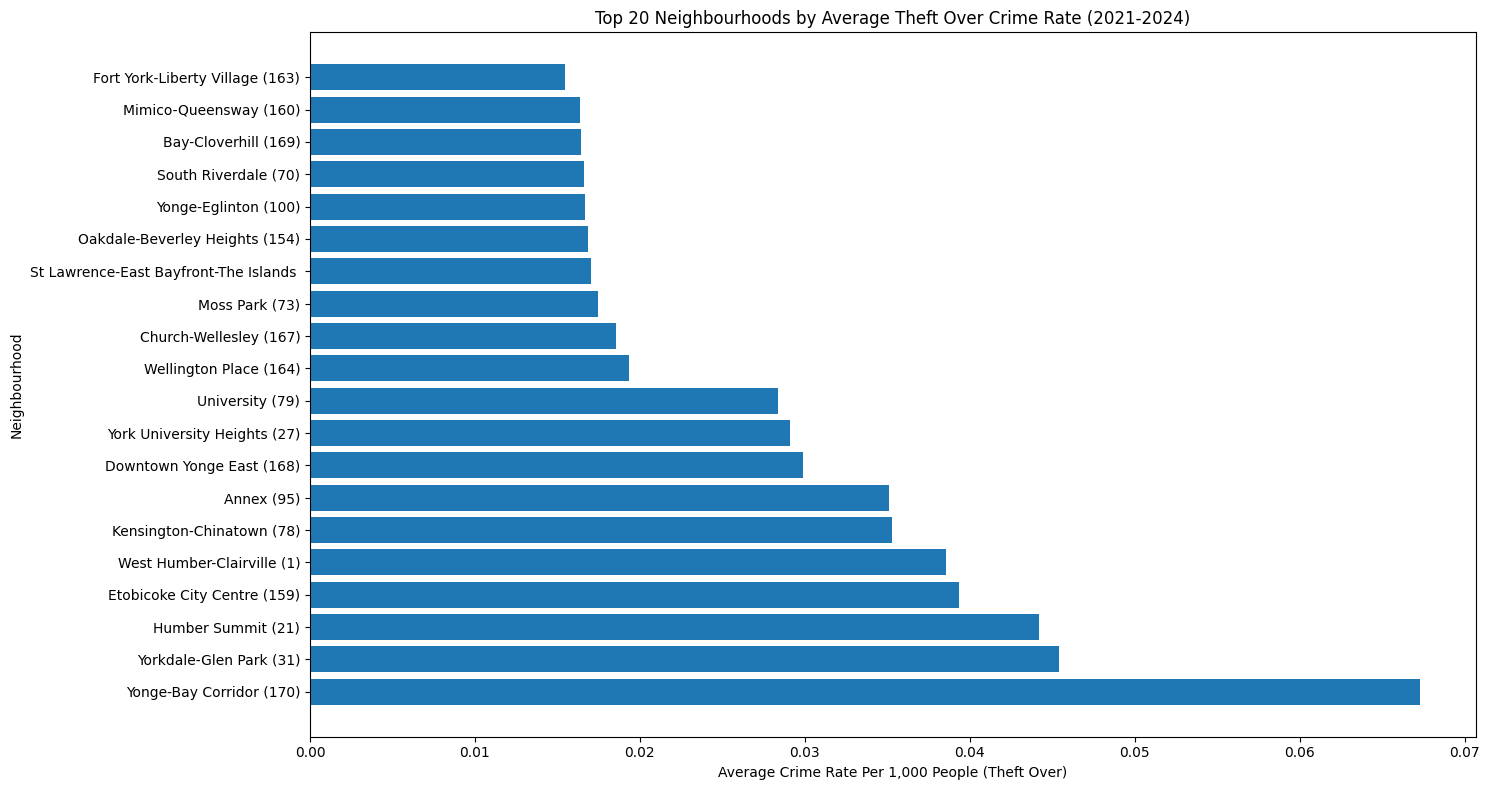

In [119]:
# Merge the grouped_counts_mci_categories_with_zeros_short with df_population
df_crime_population_category = grouped_counts_mci_categories_with_zeros_short.merge(
    df_population,
    left_on='HOOD_158',
    right_on='Neighbourhood Number',
    how='inner'
)

# Drop the redundant 'Neighbourhood Number' column
df_crime_population_category = df_crime_population_category.drop('Neighbourhood Number', axis=1)

# Calculate the crime rate per 1,000 people for each crime category per neighbourhood per week
df_crime_population_category['Crime_Rate_Category_Per_1000'] = (df_crime_population_category['Crime_counts'] / df_crime_population_category['Population_2021']) * 1000

# Group by neighbourhood and crime category and calculate the mean crime rate
average_crime_rate_category = df_crime_population_category.groupby(['HOOD_158', 'MCI_CATEGORY'], observed=False)['Crime_Rate_Category_Per_1000'].mean().reset_index()

# Merge with hood_names to get neighbourhood names
hood_names = df_mci[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates()
average_crime_rate_category = average_crime_rate_category.merge(hood_names, on='HOOD_158')

# Get unique crime categories
unique_categories = average_crime_rate_category['MCI_CATEGORY'].unique()

# Iterate through each crime category and create a bar plot
for category in unique_categories:
    # Filter data for the current category
    category_data = average_crime_rate_category[average_crime_rate_category['MCI_CATEGORY'] == category]

    # Sort by average crime rate in descending order and select top 20
    top_neighborhoods_category = category_data.sort_values(by='Crime_Rate_Category_Per_1000', ascending=False).head(20)

    # Create a horizontal bar plot for the top 20 neighbourhoods
    plt.figure(figsize=(15, 8))
    plt.barh(top_neighborhoods_category['NEIGHBOURHOOD_158'], top_neighborhoods_category['Crime_Rate_Category_Per_1000'])
    plt.xlabel(f'Average Crime Rate Per 1,000 People ({category})')
    plt.ylabel('Neighbourhood')
    plt.title(f'Top 20 Neighbourhoods by Average {category} Crime Rate (2021-2024)')
    plt.tight_layout()
    plt.show()

## Analyze overall crime rate trends

### Subtask:
Aggregate the overall crime rate per neighbourhood per week by week to get the overall crime rate trend over time. Visualize the trend.


**Reasoning**:
Group the data by week and calculate the mean crime rate, then create a line plot to visualize the trend.



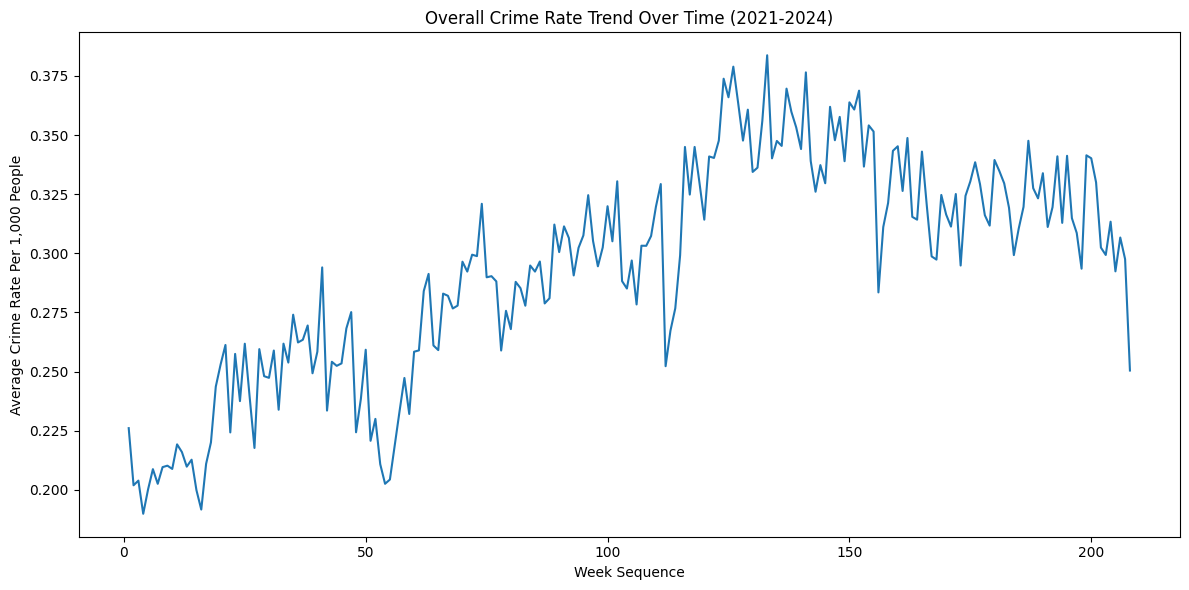

In [120]:
import matplotlib.pyplot as plt

# Group by WEEK_SEQ and calculate the mean of Crime_Rate_Per_1000
overall_crime_trend = df_crime_population.groupby('WEEK_SEQ', observed=False)['Crime_Rate_Per_1000'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(overall_crime_trend['WEEK_SEQ'], overall_crime_trend['Crime_Rate_Per_1000'])

# Add title and labels
plt.title('Overall Crime Rate Trend Over Time (2021-2024)')
plt.xlabel('Week Sequence')
plt.ylabel('Average Crime Rate Per 1,000 People')

# Display the plot
plt.tight_layout()
plt.show()

## Analyze neighbourhood crime rate trends

### Subtask:
Analyze and visualize the crime rate trends over time for specific neighbourhoods of interest.


**Reasoning**:
Identify interesting neighbourhoods from previous analysis, filter the dataframe for these neighbourhoods, group by week and calculate the average crime rate per 1000 people, and then generate line plots for each selected neighbourhood to visualize their crime rate trends over time.



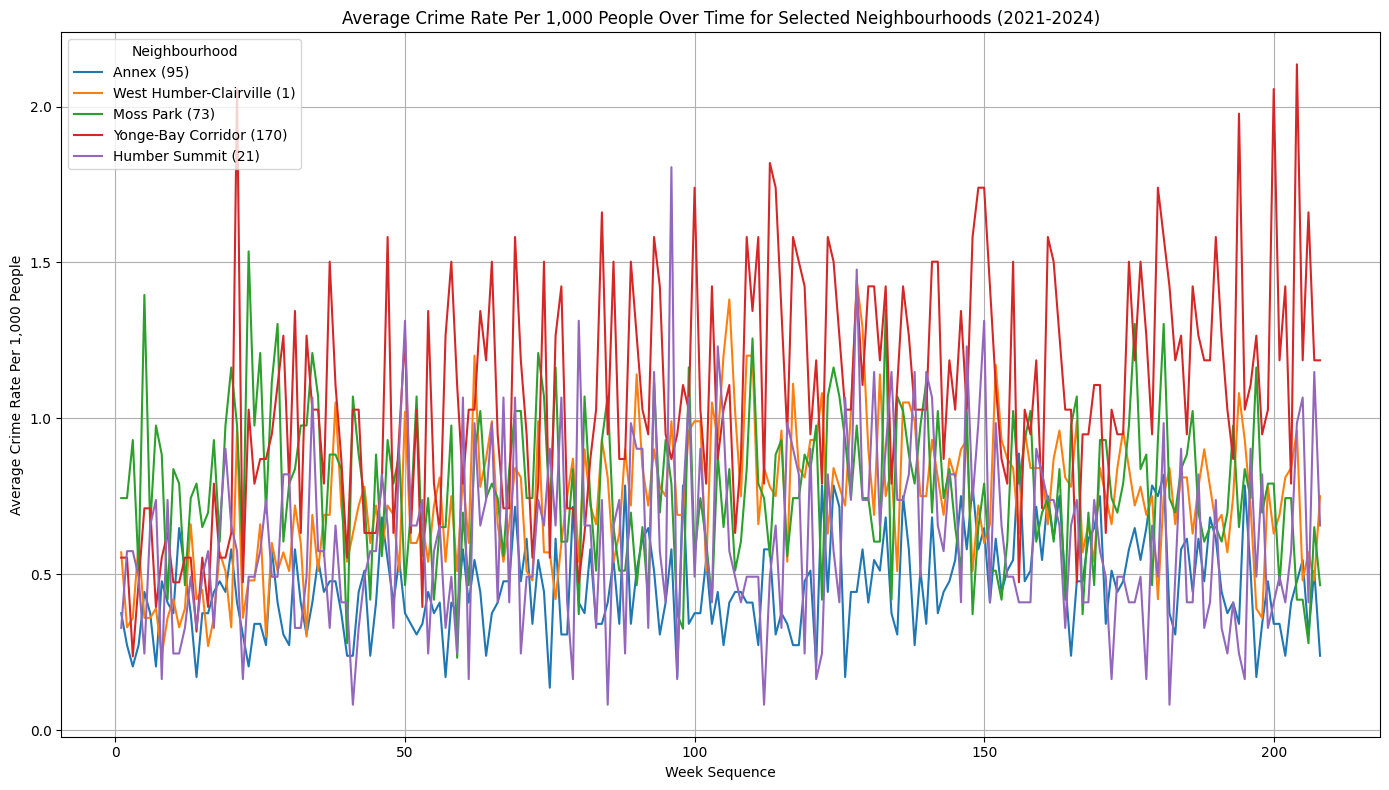

In [121]:
import matplotlib.pyplot as plt

# 1. Identify a few neighbourhoods of interest from the previous analysis.
# Based on the previous analysis, we can select neighborhoods that appeared
# in the top lists for either raw crime counts or crime rate, or both.
# Let's pick a few diverse examples:
# - West Humber-Clairville (1): High raw count, drops in rate.
# - Yonge-Bay Corridor (170): Jumps to high rate from raw count.
# - Moss Park (73): High in both lists.
# - Annex (95): High in raw count, lower in rate.
# - Humber Summit (21): Appears in top crime rate but not top raw count.
selected_hood_codes = ['001', '170', '073', '095', '021']

# Merge with hood_names to get neighbourhood names for the selected codes
hood_names = df_mci[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates()
selected_hood_names = hood_names[hood_names['HOOD_158'].isin(selected_hood_codes)]

# 2. Filter the df_crime_population DataFrame to include data only for the selected neighbourhoods.
df_selected_crime_population = df_crime_population[df_crime_population['HOOD_158'].isin(selected_hood_codes)].copy()

# 3. For each selected neighbourhood, group the filtered data by WEEK_SEQ and calculate the mean Crime_Rate_Per_1000.
# This step is not strictly necessary if we plot directly from df_selected_crime_population
# as it already has the weekly crime rate per neighbourhood. We can plot directly.

# 4. Create a line plot for each selected neighbourhood showing its average crime rate over time (WEEK_SEQ).
# We can use a single figure with multiple lines, or separate figures.
# Let's use a single figure for comparison.

plt.figure(figsize=(14, 8))

for index, row in selected_hood_names.iterrows():
    hood_code = row['HOOD_158']
    hood_name = row['NEIGHBOURHOOD_158']

    # Filter data for the current neighbourhood
    hood_data = df_selected_crime_population[df_selected_crime_population['HOOD_158'] == hood_code]

    # Plot the crime rate trend
    plt.plot(hood_data['WEEK_SEQ'], hood_data['Crime_Rate_Per_1000'], label=hood_name)


# 5. Ensure that the plots are clearly titled and have appropriate axis labels.
plt.title('Average Crime Rate Per 1,000 People Over Time for Selected Neighbourhoods (2021-2024)')
plt.xlabel('Week Sequence')
plt.ylabel('Average Crime Rate Per 1,000 People')
plt.legend(title='Neighbourhood')
plt.grid(True)

# 6. Display the plots.
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   For the crime categories analyzed (Assault, Break and Enter, Robbery, Theft Over, and Auto Theft), the top 20 neighbourhoods with the highest average crime rates per 1,000 people were identified and visualized.
*   The overall crime rate trend across all neighbourhoods showed fluctuations over the period from 2021 to 2024.
*   Analyzing specific neighbourhoods (West Humber-Clairville, Yonge-Bay Corridor, Moss Park, Annex, and Humber Summit) revealed distinct patterns and trends in their average crime rates over time, highlighting variations in how crime rates evolved in different areas.

### Insights or Next Steps

*   Investigate specific events or seasonal patterns that might explain the observed fluctuations in the overall crime rate trend and the trends in individual neighbourhoods.
*   Further analyze the top neighbourhoods identified for each crime category to understand potential underlying factors contributing to higher crime rates in those areas.
